> # **Biomedical Text Document Cancer Classification Using BioBERT and Traditional Machine Learning Techniques**

> Dataset Link : https://www.kaggle.com/datasets/falgunipatel19/biomedical-text-publication-classification/data

> Proposed BioBERT outperforms Naive Bayes and Logistic Regression in terms of accuracy, precision, recall, and F1 score. While Naive Bayes and Logistic Regression achieved 91% and 95% respectively, BioBERT reached a accuracy of 97%.

---

> **Base Paper :** Comparative analysis of machine learning algorithms for biomedical text document classification: A case study on cancer-related publications. Available at : [IURIS](https://avesis.inonu.edu.tr/yayin/a95f9c7d-f607-4a6f-a38f-cb891ed6a1d3/comparative-analysis-of-machine-learning-algorithms-for-biomedical-text-document-classification-a-case-study-on-cancer-related-publications)

> Benchmark Logistic Regression model with TF-IDF vectorisation for biomedical text classification has achieved an accuracy of 78.3%.

---

> # **Installation**

In [2]:
!pip install textstat

  Obtaining dependency information for textstat from https://files.pythonhosted.org/packages/61/4e/7a072210c25258b225ccb427f12267622cdcc747b003b5aacf60febbdff5/textstat-0.7.5-py3-none-any.whl.metadata
  Obtaining dependency information for pyphen from https://files.pythonhosted.org/packages/7b/1f/c2142d2edf833a90728e5cdeb10bdbdc094dde8dbac078cee0cf33f5e11b/pyphen-0.17.2-py3-none-any.whl.metadata
  Obtaining dependency information for cmudict from https://files.pythonhosted.org/packages/fa/ff/617bdeab02c2ce0384e64a5bb00ec479322dbf019491def68af6a860733d/cmudict-1.0.32-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources>=5 from https://files.pythonhosted.org/packages/a4/ed/1f1afb2e9e7f38a545d628f864d562a5ae64fe6f7a10e28ffb9b185b4e89/importlib_resources-6.5.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/105.3 kB ? eta -:--:--
   ----------- ---------------------------- 30.7/105.3 kB 1.3 MB/s eta 0:00:01
   ----------------------

In [ ]:
! pip install contractions

In [3]:
! pip install transformers datasets torch scikit-learn

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/13/85/6c1092d4b06c3db1ed23d4106488750917156af0b24ab0a2d9951830b0e9/torch-2.7.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.10.0 from https://files.pythonhosted.org/packages/8b/54/b1ae86c0973cc6f0210b53d508ca3641fb6d0c56823f288d108bc7ab3cc8/typing_extensions-4.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for sympy>=1.13.3 from https://files.pythonhosted.org/packages/a2/09/77d55d46fd61b4a135c444fc97158ef34a095e5681d0a6c10b75bf356191/sympy-1.14.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/212.5 MB 1.7 MB/s eta 0:02:09
   ---------------------------------------- 0.1/212.5 MB 1.5 MB/s eta 0:02:23
   ---------------------------------------- 0.2/212.5 MB 1.8 MB/s eta 0:01:58
   ---------------------------------------- 0.3/212.5 MB 1.

In [ ]:
! pip install wandb

In [ ]:
!pip install scikit-optimize

In [6]:
! pip install word2number

In [5]:
!pip install evaluate

  Obtaining dependency information for evaluate from https://files.pythonhosted.org/packages/a2/e7/cbca9e2d2590eb9b5aa8f7ebabe1beb1498f9462d2ecede5c9fd9735faaf/evaluate-0.4.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/84.0 kB ? eta -:--:--
   -------------- ------------------------- 30.7/84.0 kB ? eta -:--:--
   ---------------------------------------- 84.0/84.0 kB 945.8 kB/s eta 0:00:00


> # **Libraries**

In [4]:
# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Text Preprocessing and NLP
import re
import string
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions
from collections import Counter
from textstat import flesch_kincaid_grade
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm import tqdm
import random

# Model Evaluation Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    cohen_kappa_score, classification_report, confusion_matrix,
    precision_recall_curve, auc, precision_recall_fscore_support, roc_curve
)
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Bayesian Optimization
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, GlobalMaxPooling1D, Dense, Dropout,
    BatchNormalization, SpatialDropout1D, Add, Input
)
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

# Transformers and PyTorch
import torch
from transformers import (
    AutoTokenizer, AutoModel, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, DataCollatorWithPadding
)

# Hugging Face Datasets
from datasets import Dataset, DatasetDict

# WordCloud
from wordcloud import WordCloud

# Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
# Downloading required NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

> # **Loading Dataset**

In [3]:
# loading Cancer Text Documents Classification dataset available on Kaggle
med_text_data = pd.read_csv("dataset.csv", encoding='latin1')

NameError: name 'pd' is not defined

In [21]:
# examining few records
med_text_data.head(10)

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
5,5,Thyroid_Cancer,This study was performed to explore the effec...
6,6,Thyroid_Cancer,This study was performed assess the clinical ...
7,7,Thyroid_Cancer,Journal of International Medical Research  Th...
8,8,Thyroid_Cancer,Gastric cancer GC persists as a worldwide pub...
9,9,Thyroid_Cancer,Scars Burns HealingVolume  reuse guideli...


* This dataset includes cancer documents classified into 3 categories like 'Thyroid_Cancer','Colon_Cancer' and 'Lung_Cancer'.

> ## **Data Structure**

In [22]:
# printing the data structure information
print("^"*38)
med_text_data.info()
print("^"*38)

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.6+ KB
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


* Dataset has total 7,570 entries with three columns, but column names seem incorrectly formatted.
* 'Unnamed: 0' is an unnecessary index and column names need proper renaming for clarity.

> ## **Missing Values**

In [23]:
# check missing values
print("^"*15)
print("Missing Values")
print("^"*15)
med_text_data.isna().sum()

^^^^^^^^^^^^^^^
Missing Values
^^^^^^^^^^^^^^^


Unnamed: 0    0
0             0
a             0
dtype: int64

* Dataset has no missing values across all columns which ensures completeness.

> ## **Sample Text and Associated Label**

In [2]:
# checking some text data from column 'a'
med_text_data['a'][0]

NameError: name 'med_text_data' is not defined

* Need to apply text data cleaning methods to prepare data for embeddings and model trainining.
* As now it has lots of noise which may affect the performance.

In [33]:
# checking the associated label of the text from colum 'a'
med_text_data['0'][0]

'Thyroid_Cancer'

> ## **Column Name Renaming**

In [35]:
# renaming the column names for better clarity
med_text_data.columns = ["Index", "Category", "Text"]

# displaying the updated column names and a preview of the dataset
med_text_data.head(10)

,Index,Category,Text
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
5,5,Thyroid_Cancer,This study was performed to explore the effec...
6,6,Thyroid_Cancer,This study was performed assess the clinical ...
7,7,Thyroid_Cancer,Journal of International Medical Research  Th...
8,8,Thyroid_Cancer,Gastric cancer GC persists as a worldwide pub...
9,9,Thyroid_Cancer,Scars Burns HealingVolume  reuse guideli...


* Renamed the columns to 'Index', 'Category', and 'Text' which improved the clarity.
* Now  'Category' column holds class labels, while 'Text' contains the content from medical documents for classification.

> ## **Cancer Categories**

In [36]:
# Checking the categories of cancer
print("^"*36)
print("\tAvailable Categories")
print("^"*36)
for category in med_text_data['Category'].unique():
    print("\t", category)
print("^"*36)

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	Available Categories
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	 Thyroid_Cancer
	 Colon_Cancer
	 Lung_Cancer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


* There are three cancer related categories, these labels will be used for classifying the medical text documents
  


> # **Data Understanding and Visualisation**

> ## **Most Frequent Words in Medical Text**

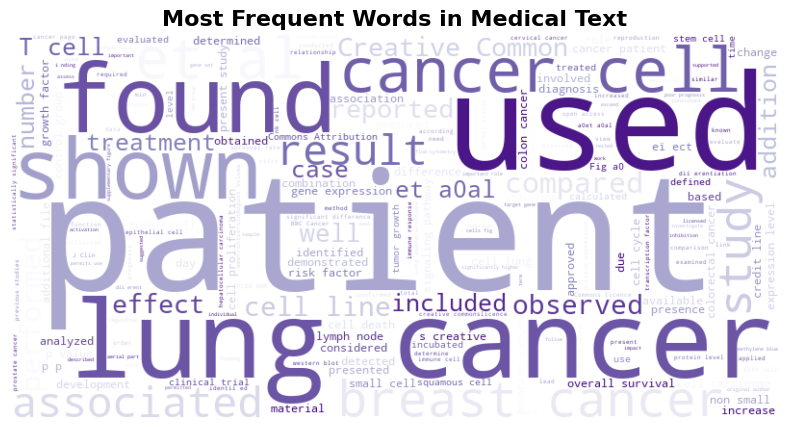

In [38]:
# combining all text data into a single string
text_data = " ".join(med_text_data["Text"])

# generating Word Cloud and plotting the word cloud
wordcloud = WordCloud(width=800, height=400, colormap="Purples", background_color="white").generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes

# formatting the title
plt.title("Most Frequent Words in Medical Text", fontsize=16, fontweight = 'bold')
plt.show()

* This word cloud visually represents the most frequent terms found in a collection of medical texts. The larger the word, the more often it appeared in the documents, providing a quick insight into the prevalent topics and themes within the medical corpus.

> ## **Top 20 Most Common Words in Medical Text**

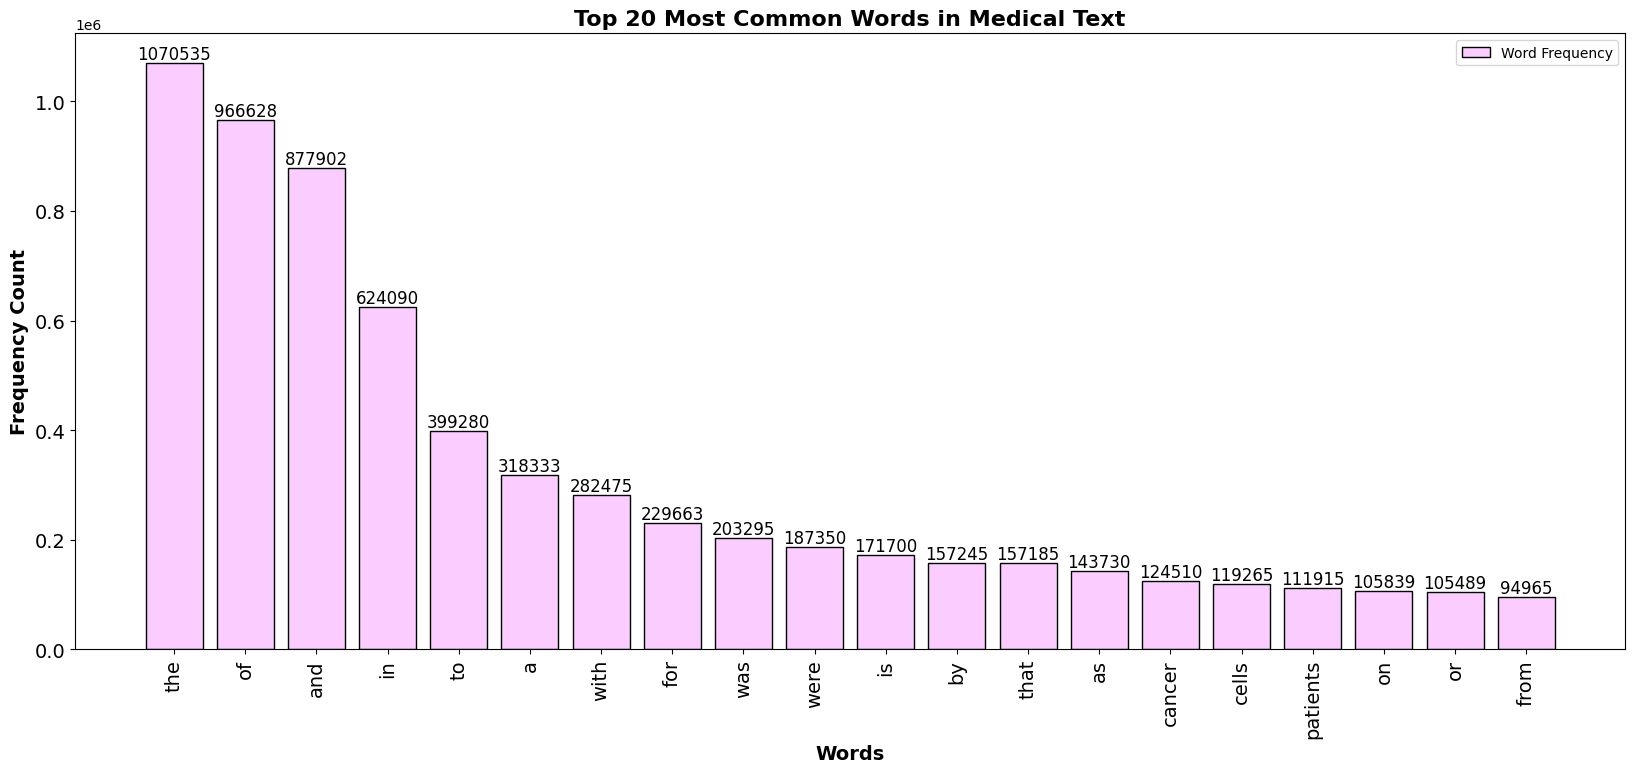

In [ ]:
# tokenising the word
words = text_data.split()

# counting word frequencies and getting top 20 most common words
word_counts = Counter(words)
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

# plotting bar chart
plt.figure(figsize=(20, 8))
bars = plt.bar(words, counts, color='#faccff', edgecolor='black')

# adding annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval}", ha="center", va="bottom", fontsize=12)

# formatting the title, label and ticks
plt.xlabel("Words", fontsize=14, fontweight='bold')
plt.ylabel("Frequency Count", fontsize=14, fontweight='bold')
plt.title("Top 20 Most Common Words in Medical Text", fontsize=16, fontweight='bold')
plt.xticks(rotation=90, ha="center", fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["Word Frequency"], loc="upper right")
plt.show()

* This chart displays the top 20 most frequent words found in a collection of medical texts, revealing a high prevalence of common grammatical terms alongside medically relevant keywords like "cancer" and "cells".  The prominence of these general words suggests a need for more sophisticated analysis to extract truly meaningful insights from the text.

> ## **Readability Score Density Across Medical Texts**

In [ ]:
# computing Flesch-Kincaid Grade Level readability scores
med_text_data["Readability_Score"] = med_text_data["Text"].apply(flesch_kincaid_grade)

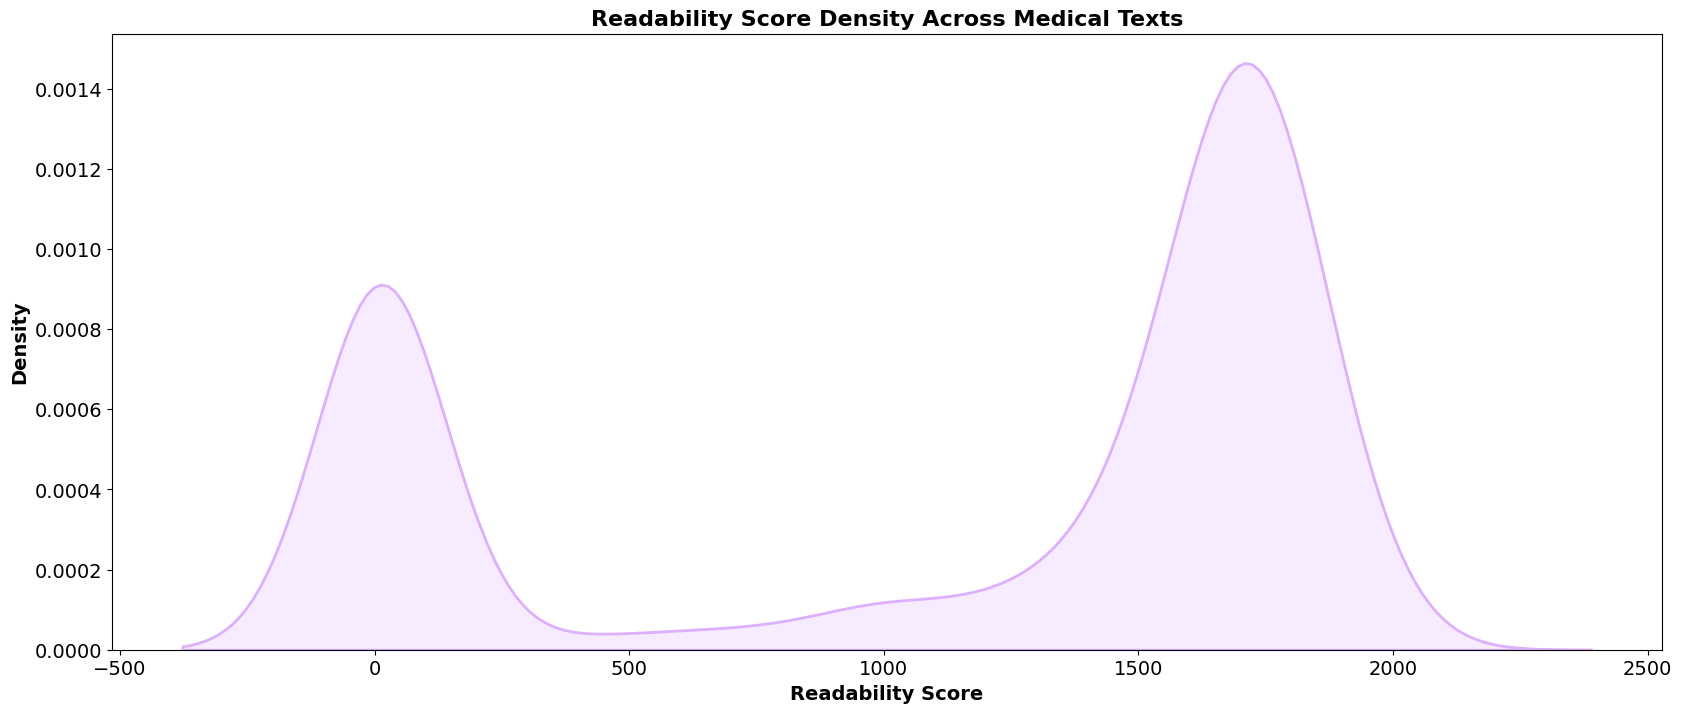

In [ ]:
#  plotting KDE plot
plt.figure(figsize=(20, 8))
sns.kdeplot(med_text_data["Readability_Score"], fill=True, color='#dcb0ff', linewidth=2)

# formating titles, labels and ticks
plt.title("Readability Score Density Across Medical Texts", fontsize=16, fontweight="bold")
plt.xlabel("Readability Score", fontsize=14, fontweight="bold")
plt.ylabel("Density", fontsize=14, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* This graph represents that there is bimodal distribution of readability scores in medical texts.
* Significant peak can be seen around 1750 which indicates complex language.
* Another peak around 0 suggests simpler texts.
* This highlights wide range of readability levels within medical documents.

> ## **Readability Score Distribution by Topic**

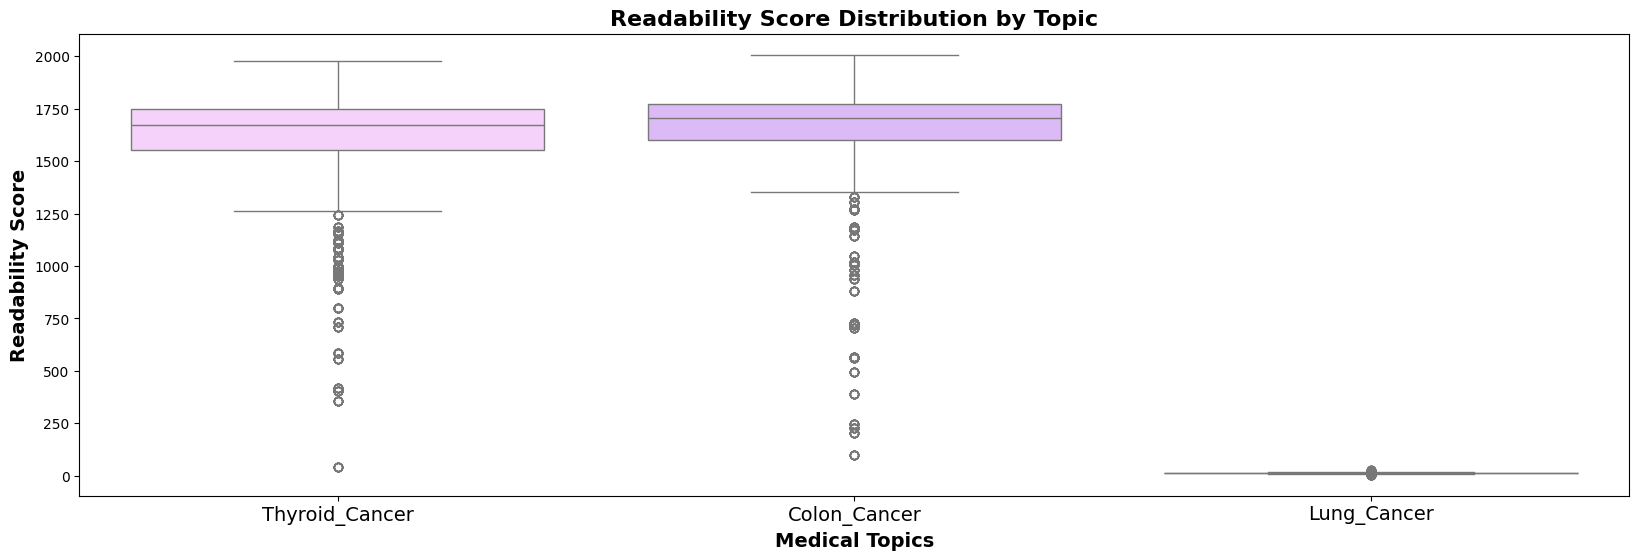

In [ ]:
# plotting box plot
plt.figure(figsize=(20, 6))
sns.boxplot(x="Category", y="Readability_Score", data=med_text_data, palette=['#faccff', '#dcb0ff', '#be93fd'])

# formatting title, lable and ticks
plt.xlabel("Medical Topics", fontsize=14, fontweight = 'bold')
plt.ylabel("Readability Score", fontsize=14, fontweight = 'bold')
plt.title("Readability Score Distribution by Topic", fontsize=16, fontweight = 'bold')
plt.xticks(rotation=0, fontsize=14)
plt.xticks(fontsize=14)
plt.show()

* This box plot compares the readability scores of medical texts across three cancer types, revealing that Lung Cancer materials have significantly lower reading difficulty compared to Thyroid and Colon Cancer. This suggests that patient information for Lung Cancer may be more accessible to a wider audience.

> ## **Distribution of Medical Topics in Text**

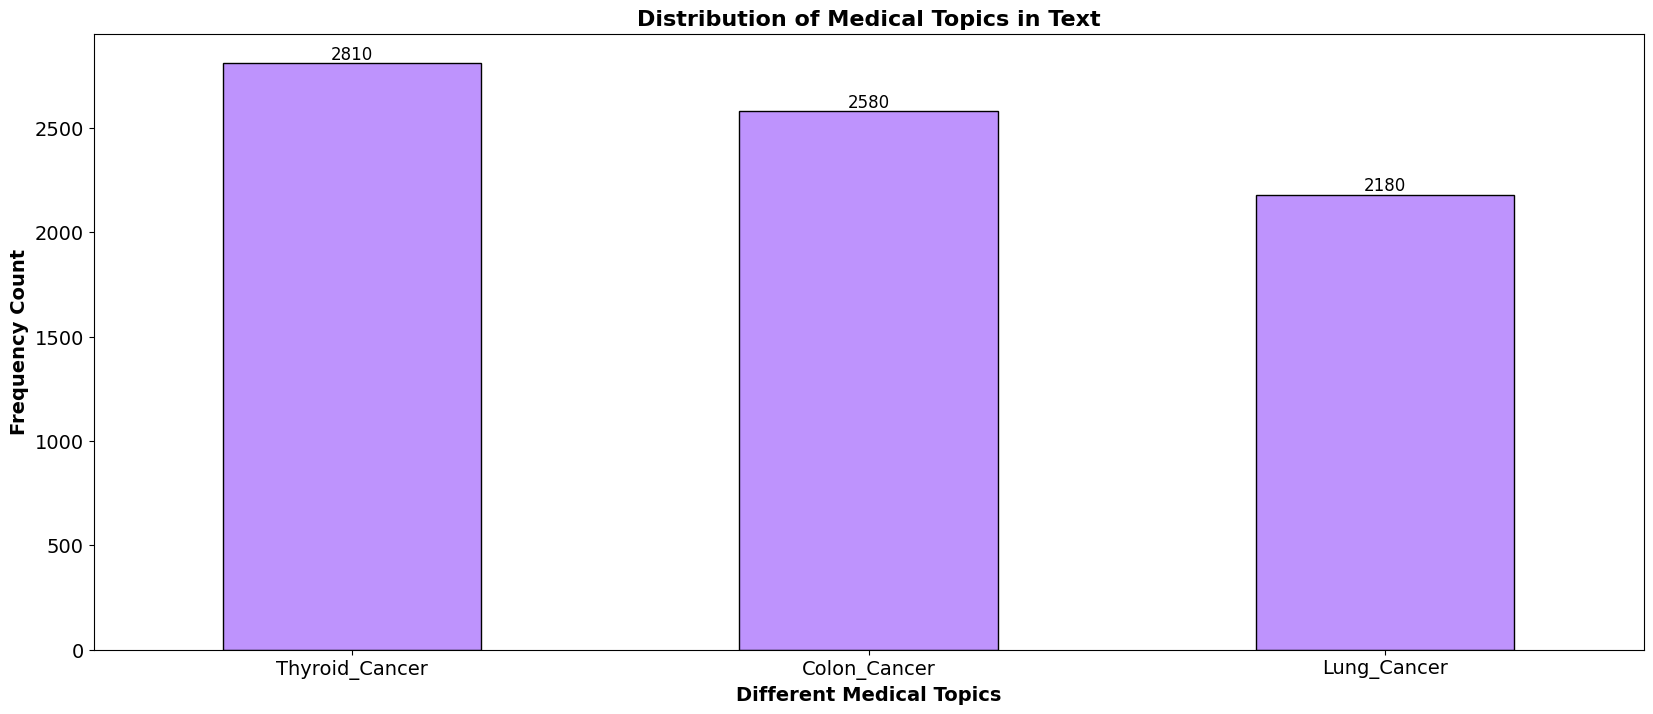

In [ ]:
# Counting occurrences of each topic
topic_counts = med_text_data["Category"].value_counts()

# plotting Stacked Bar Chart
plt.figure(figsize=(20, 8))
bars = topic_counts.plot(kind="bar", color='#be93fd', edgecolor="black")

# adding annotations on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval)}", ha="center", va="bottom", fontsize=12)

# formatting title, labels and ticks
plt.xlabel("Different Medical Topics", fontsize=14, fontweight ='bold')
plt.ylabel("Frequency Count", fontsize=14, fontweight ='bold')
plt.title("Distribution of Medical Topics in Text", fontsize=16, fontweight ='bold')
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.show()

* This bar chart illustrates the distribution of three medical topics within a text, showing that Thyroid Cancer appears most frequently, followed by Colon Cancer, and lastly Lung Cancer. The varying frequencies suggest a potential focus or emphasis on Thyroid Cancer within the analysed medical text.


> ## **Correlation Between Topics and Keywords**

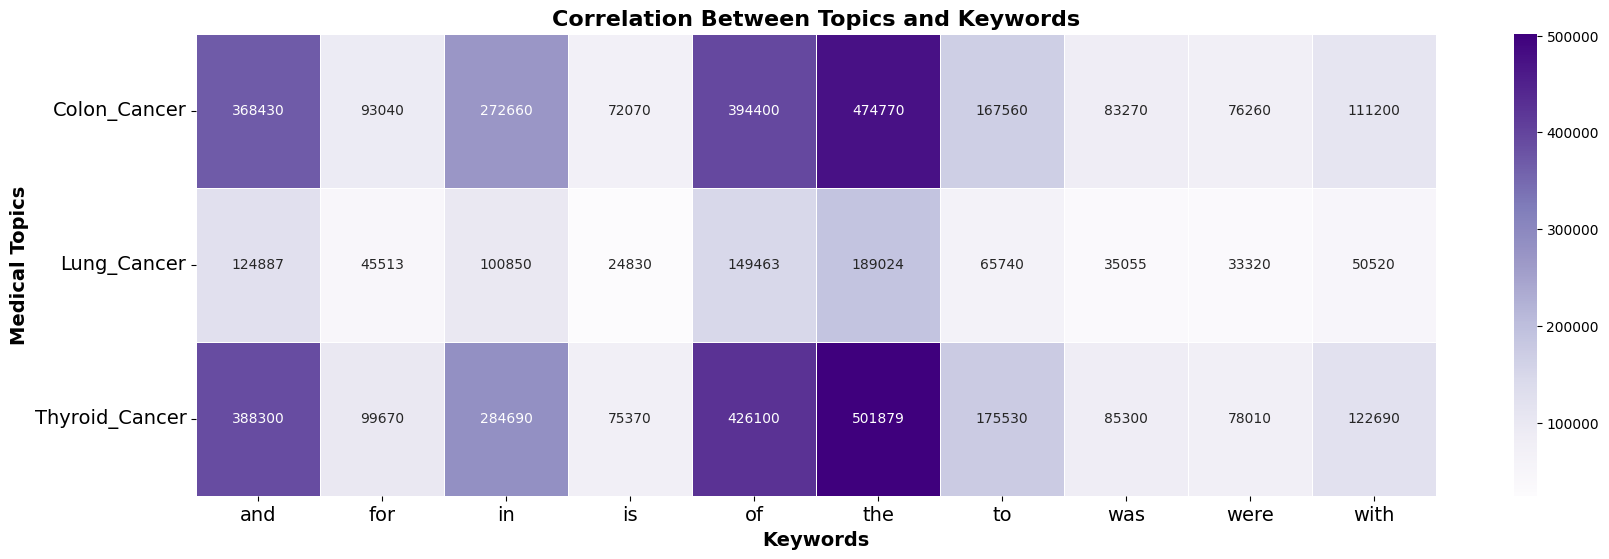

In [ ]:
# converting text data into a term frequency matrix
vectorizer = CountVectorizer(max_features=10)
word_matrix = vectorizer.fit_transform(med_text_data["Text"]).toarray()
word_df = pd.DataFrame(word_matrix, columns=vectorizer.get_feature_names_out())

# aggregating word counts by medical topic
heatmap_data = pd.concat([med_text_data["Category"], word_df], axis=1).groupby("Category").sum()

# plotting heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(heatmap_data, cmap="Purples", annot=True, fmt="d", linewidths=0.5)

# formatting title, labels nad ticks
plt.xlabel("Keywords", fontsize=14, fontweight='bold')
plt.ylabel("Medical Topics", fontsize=14, fontweight='bold')
plt.title("Correlation Between Topics and Keywords", fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.show()

* This heatmap reveals the correlation between specific keywords and medical topics, showcasing the frequency of each keyword's association with a given topic. The varying intensities of purple indicate the strength of these relationships, with deeper shades representing higher co-occurrence counts.

In [ ]:
med_text_data.head(10)

,Index,Category,Text,Readability_Score
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,1124.6
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",971.7
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,1150.7
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,732.6
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,1187.4
5,5,Thyroid_Cancer,This study was performed to explore the effec...,1321.2
6,6,Thyroid_Cancer,This study was performed assess the clinical ...,1001.8
7,7,Thyroid_Cancer,Journal of International Medical Research  Th...,961.6
8,8,Thyroid_Cancer,Gastric cancer GC persists as a worldwide pub...,1616.4
9,9,Thyroid_Cancer,Scars Burns HealingVolume  reuse guideli...,1648.0


In [39]:
# Calculating text length
med_text_data["Text_Length"] = med_text_data["Text"].apply(len)

In [ ]:
med_text_data.head(10)

,Index,Category,Text,Readability_Score,Text_Length
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,1124.6,20707
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",971.7,17018
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,1150.7,21622
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,732.6,13860
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,1187.4,23696
5,5,Thyroid_Cancer,This study was performed to explore the effec...,1321.2,27314
6,6,Thyroid_Cancer,This study was performed assess the clinical ...,1001.8,20220
7,7,Thyroid_Cancer,Journal of International Medical Research  Th...,961.6,19869
8,8,Thyroid_Cancer,Gastric cancer GC persists as a worldwide pub...,1616.4,32611
9,9,Thyroid_Cancer,Scars Burns HealingVolume  reuse guideli...,1648.0,32565


> ## **Distribution of Text Lengths**

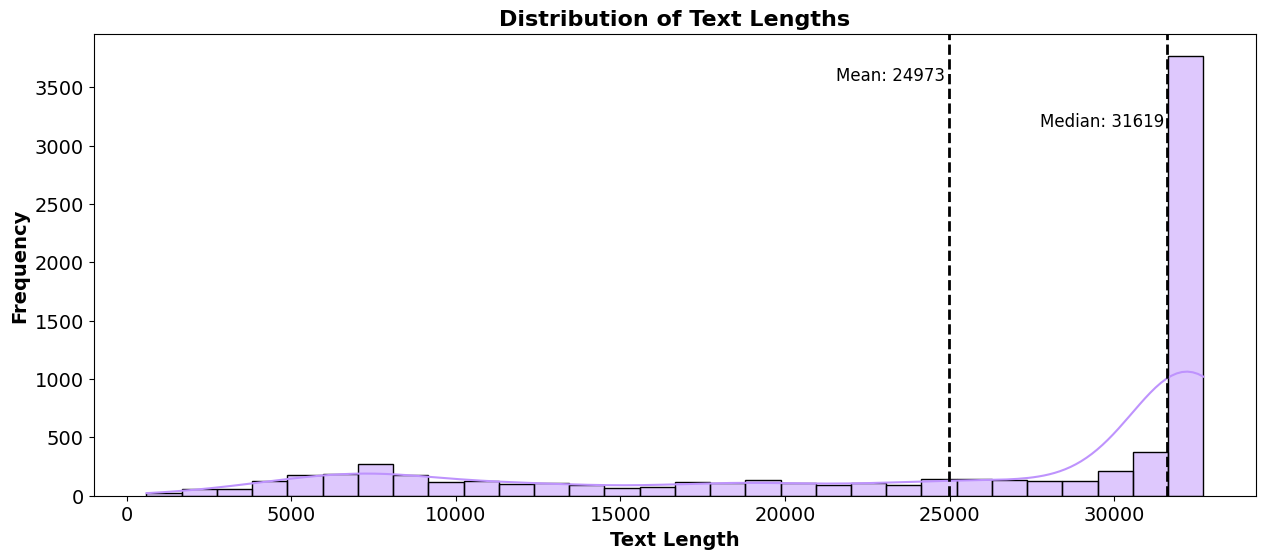

In [ ]:
# Plot histogram
plt.figure(figsize=(15, 6))
sns.histplot(med_text_data["Text_Length"], bins=30, kde=True, color='#be93fd')

# formating titles, labels and ticks
plt.title("Distribution of Text Lengths", fontsize=16, fontweight="bold")
plt.xlabel("Text Length", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Annotating mean and median
mean_length = med_text_data["Text_Length"].mean()
median_length = med_text_data["Text_Length"].median()
plt.axvline(mean_length, color='black', linestyle='dashed', linewidth=2)
plt.axvline(median_length, color='black', linestyle='dashed', linewidth=2)

# Adjusting annotations to the left side
plt.text(mean_length - 100, plt.ylim()[1] * 0.9, f'Mean: {int(mean_length)}', fontsize=12, color='black', ha='right')
plt.text(median_length - 100, plt.ylim()[1] * 0.8, f'Median: {int(median_length)}', fontsize=12, color='black', ha='right')
plt.show()

* The above created histogram shows right skewed distribution of text lengths in the medical dataset.
* Majority of texts are clustered around 32,619 words (median), with a long tail indicating some documents exceed this significantly.
* Mean text length is 24,973 words, lower than the median which confirms the skew.

> ## **Text Length Distribution by Cancer Category**

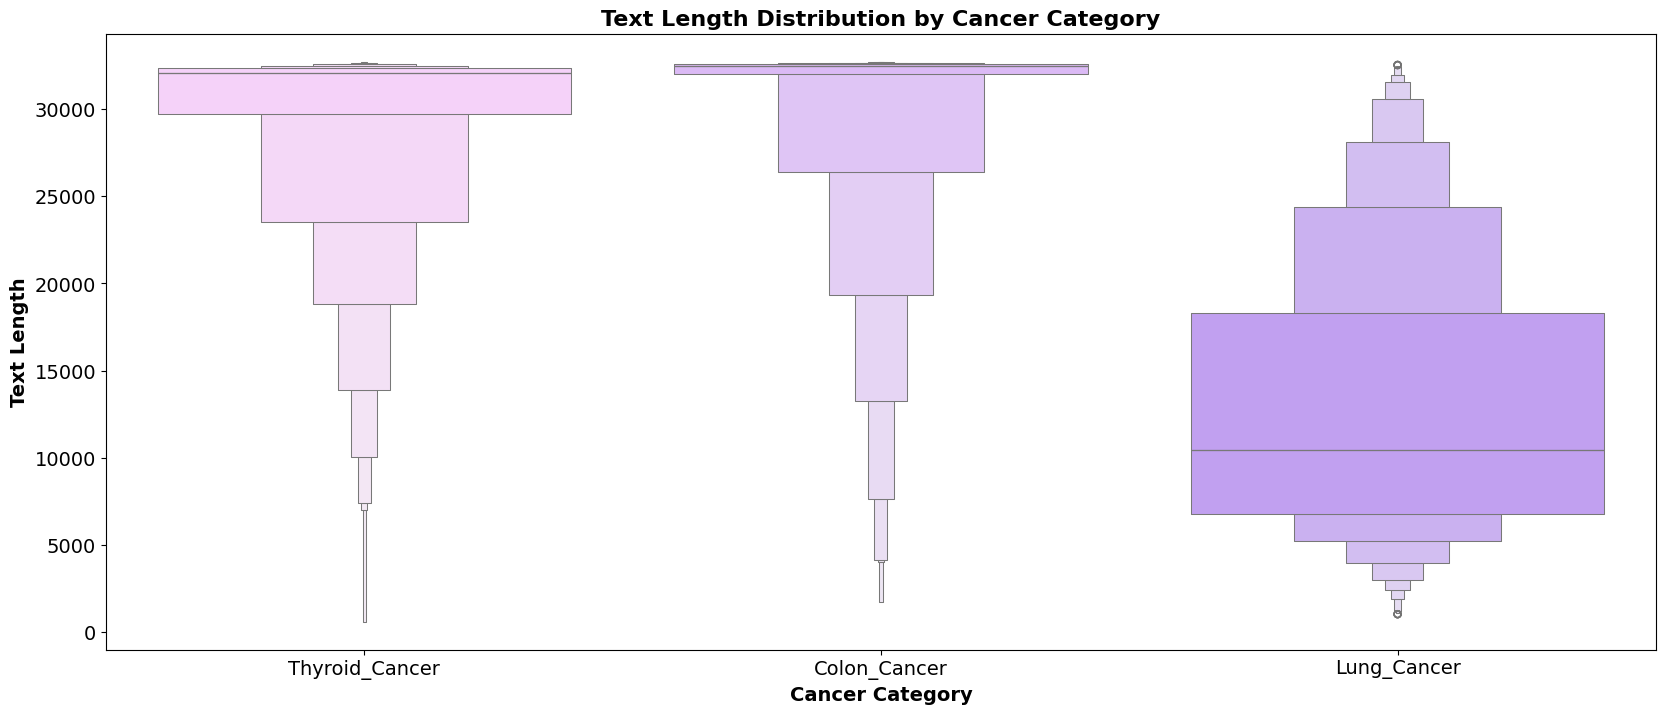

In [ ]:
# Creating a boxen plot
plt.figure(figsize=(20, 8))
sns.boxenplot(x="Category", y="Text_Length", data=med_text_data, palette=['#faccff', '#dcb0ff', '#be93fd'])

# formating title, labels and ticks
plt.title("Text Length Distribution by Cancer Category", fontsize=16, fontweight="bold")
plt.xlabel("Cancer Category", fontsize=14, fontweight="bold")
plt.ylabel("Text Length", fontsize=14, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* This boxen plot shows text length distribution across cancer categories.
* 'Thyroid_Cancer' and 'Colon_Cancer' have a median text length of  around 30,000, with a wide range.
* 'Lung_Cancer' exhibits greater variability, with a median around 10,000 and a wider interquartile range.
* Presence of outliers in all categories suggests variations in document lengths.

In [ ]:
# Counting the number of unique words in each text
med_text_data["Unique_Word_Count"] = med_text_data["Text"].apply(lambda x: len(set(str(x).split())))
med_text_data.head(10)

,Index,Category,Text,Readability_Score,Text_Length,Unique_Word_Count
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,1124.6,20707,1098
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",971.7,17018,994
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,1150.7,21622,1384
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,732.6,13860,909
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,1187.4,23696,1318
5,5,Thyroid_Cancer,This study was performed to explore the effec...,1321.2,27314,1577
6,6,Thyroid_Cancer,This study was performed assess the clinical ...,1001.8,20220,1105
7,7,Thyroid_Cancer,Journal of International Medical Research  Th...,961.6,19869,1153
8,8,Thyroid_Cancer,Gastric cancer GC persists as a worldwide pub...,1616.4,32611,1632
9,9,Thyroid_Cancer,Scars Burns HealingVolume  reuse guideli...,1648.0,32565,1600


> ## **Box Plot of Unique Word Count**

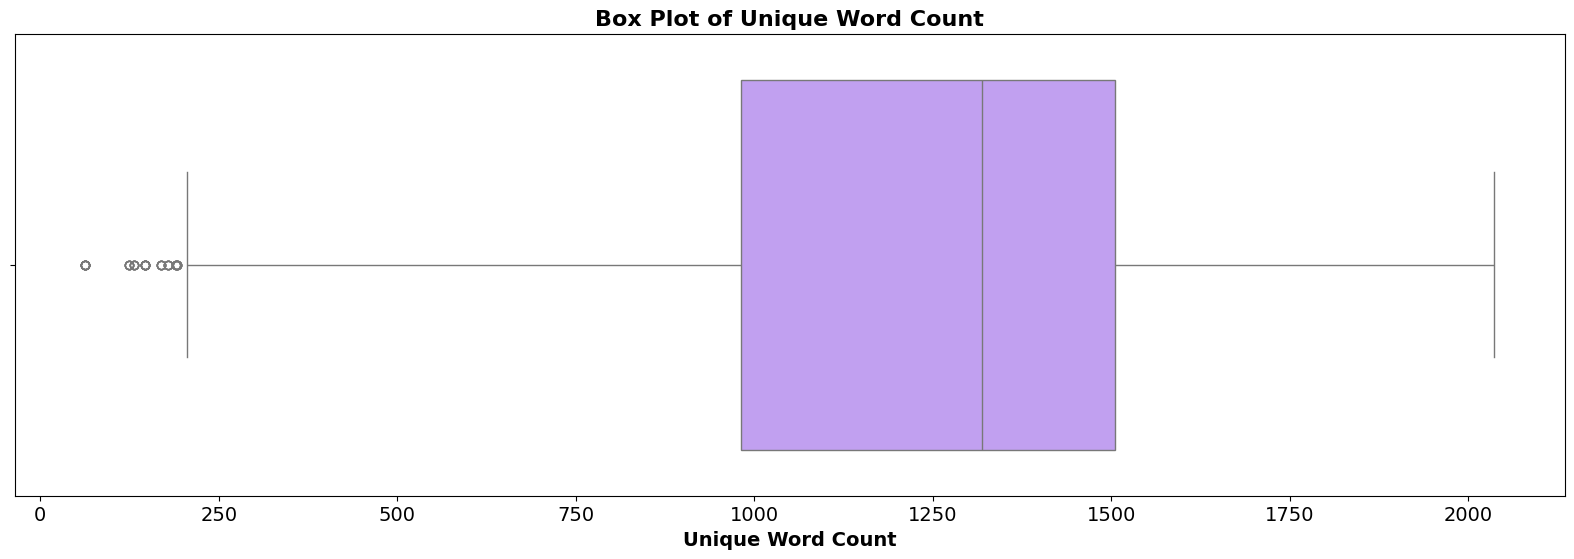

In [ ]:
# Plotting boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(x=med_text_data["Unique_Word_Count"], color='#be93fd')

# formating title, labels and ticks
plt.title("Box Plot of Unique Word Count", fontsize=16, fontweight="bold")
plt.xlabel("Unique Word Count", fontsize=14, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* This box plot indicates the distribution of unique word counts in the medical text dataset.
* Median is around 1250 unique words.
* Interquartile range (IQR) spans from approximately 1000 to 1500 which indicates the middle 50% of the data.  
* Few outliers are present below 250 unique words.

> ## **Unique Word Count Distribution by Cancer Category**

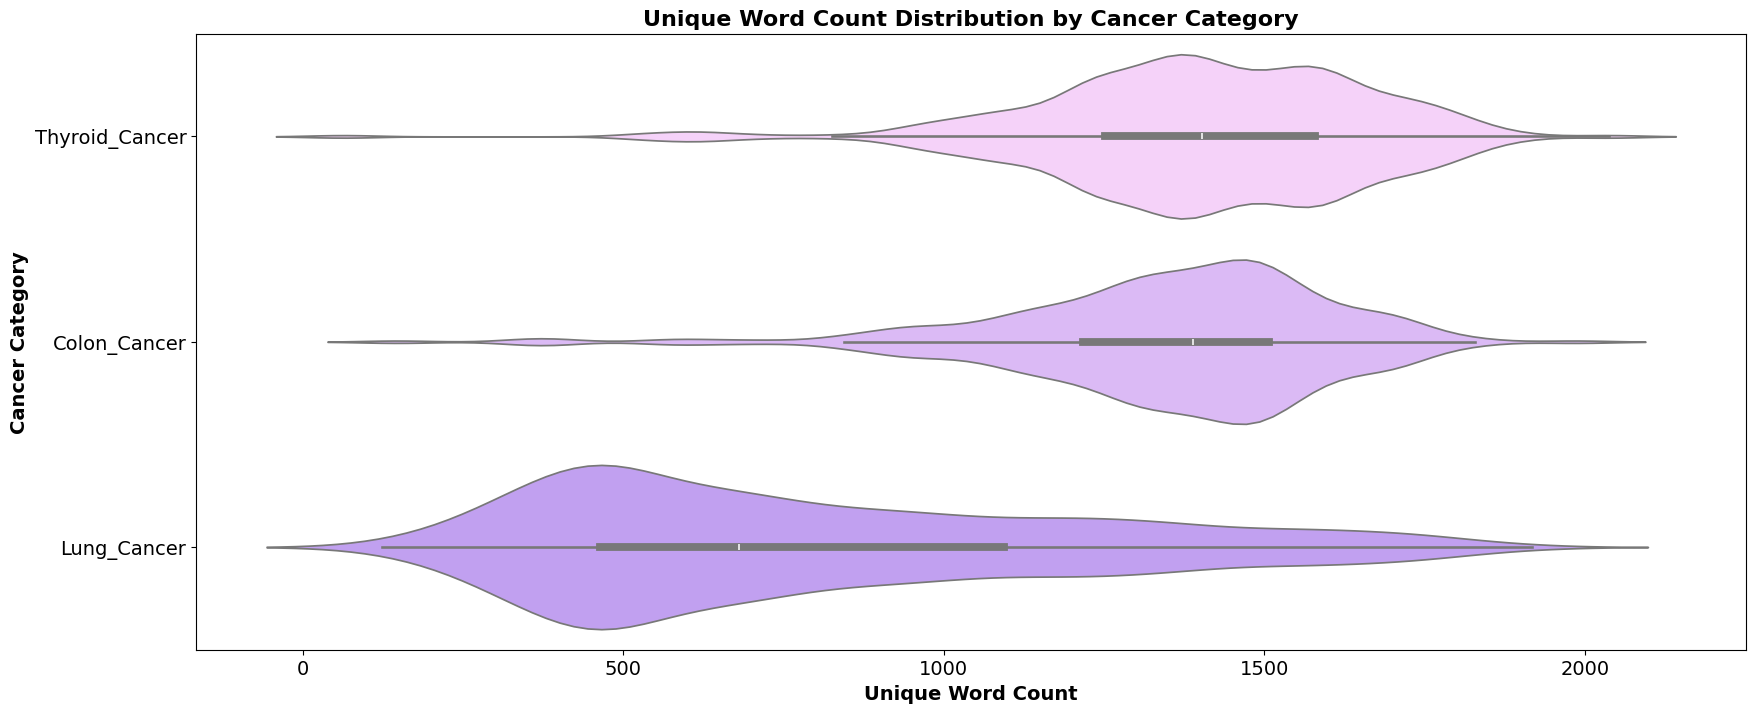

In [ ]:
# Plotting violine plot
plt.figure(figsize=(20, 8))
sns.violinplot(y="Category", x="Unique_Word_Count", data=med_text_data, palette=['#faccff', '#dcb0ff', '#be93fd'])

# formating title, labels and ticks
plt.title("Unique Word Count Distribution by Cancer Category", fontsize=16, fontweight="bold")
plt.xlabel("Unique Word Count", fontsize=14, fontweight="bold")
plt.ylabel("Cancer Category", fontsize=14, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* This violin plot shows the unique word count distribution for each cancer category.
* 'Thyroid_Cancer' and 'Colon_Cancer' have median unique word counts around 1300 - 1500, while 'Lung_Cancer' has lower median around 700 - 900.
* 'Lung_Cancer' also shows the highest variability, with values ranging from near zero to over 2,000 which indicates diverse document lengths.

> # **Data Preprocessing**

In [14]:
med_text_data.head(10)

,Index,Category,Text
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
5,5,Thyroid_Cancer,This study was performed to explore the effec...
6,6,Thyroid_Cancer,This study was performed assess the clinical ...
7,7,Thyroid_Cancer,Journal of International Medical Research  Th...
8,8,Thyroid_Cancer,Gastric cancer GC persists as a worldwide pub...
9,9,Thyroid_Cancer,Scars Burns HealingVolume  reuse guideli...


In [ ]:
# Replacing "_" with a space in the Category column using pandas
med_text_data["Category"] = med_text_data["Category"].str.replace("_", " ")
med_text_data.head(10)

,Index,Category,Text,Readability_Score,Text_Length,Unique_Word_Count
0,0,Thyroid Cancer,Thyroid surgery in children in a single insti...,1124.6,20707,1098
1,1,Thyroid Cancer,""" The adopted strategy was the same as that us...",971.7,17018,994
2,2,Thyroid Cancer,coronary arterybypass grafting thrombosis ï¬b...,1150.7,21622,1384
3,3,Thyroid Cancer,Solitary plasmacytoma SP of the skull is an u...,732.6,13860,909
4,4,Thyroid Cancer,This study aimed to investigate serum matrix ...,1187.4,23696,1318
5,5,Thyroid Cancer,This study was performed to explore the effec...,1321.2,27314,1577
6,6,Thyroid Cancer,This study was performed assess the clinical ...,1001.8,20220,1105
7,7,Thyroid Cancer,Journal of International Medical Research  Th...,961.6,19869,1153
8,8,Thyroid Cancer,Gastric cancer GC persists as a worldwide pub...,1616.4,32611,1632
9,9,Thyroid Cancer,Scars Burns HealingVolume  reuse guideli...,1648.0,32565,1600


> ## **Lowercase and Expanding Contractions**

Lowercasing ensures uniformity, reducing variations caused by capitalisation, while contraction expansion converts shortened words ("don't" to "do not"), improving text consistency. This enhances text preprocessing for better feature extraction in NLP tasks.

In [ ]:
def clean_text_col_1(text):
    """
    This function converts text to lowercase and expands contractions

    Parameters:
    text : Input text document

    Returns:
    str: Cleaned text
    """
    # Convert to lowercase
    text = text.lower()
    # Expand contractions
    text = contractions.fix(text)
    return text

In [ ]:
# Calling a function
med_text_data["Text"] = med_text_data["Text"].apply(clean_text_col_1)

In [ ]:
med_text_data.head(10)

,Index,Category,Text,Readability_Score,Text_Length,Unique_Word_Count
0,0,Thyroid Cancer,thyroid surgery in children in a single insti...,1124.6,20707,1098
1,1,Thyroid Cancer,""" the adopted strategy was the same as that us...",971.7,17018,994
2,2,Thyroid Cancer,coronary arterybypass grafting thrombosis ï¬b...,1150.7,21622,1384
3,3,Thyroid Cancer,solitary plasmacytoma sp of the skull is an u...,732.6,13860,909
4,4,Thyroid Cancer,this study aimed to investigate serum matrix ...,1187.4,23696,1318
5,5,Thyroid Cancer,this study was performed to explore the effec...,1321.2,27314,1577
6,6,Thyroid Cancer,this study was performed assess the clinical ...,1001.8,20220,1105
7,7,Thyroid Cancer,journal of international medical research  th...,961.6,19869,1153
8,8,Thyroid Cancer,gastric cancer gc persists as a worldwide pub...,1616.4,32611,1632
9,9,Thyroid Cancer,scars burns healingvolume  reuse guideli...,1648.0,32565,1600


> ## **Removes Punctuation, Special characters & URLs**

These methods help clean text data by removing unwanted elements. URLs are eliminated to prevent irrelevant links from affecting analysis. Punctuation is stripped to standardise text and special characters are removed to retain only alphanumeric content. This improves text consistency, enhances tokenisation and boosts the performance of NLP models.

In [ ]:
# defining a function to removes URLs and punctuation from text
def clean_text_col_2(text):
    """
    This function removes URLs, punctuation and special characters.

    Parameters:
    text (str): Input text document

    Returns:
    str: Cleaned text
    """
    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove special characters (keeping only alphanumeric and spaces)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

In [ ]:
# Calling a function
med_text_data["Text"] = med_text_data["Text"].apply(clean_text_col_2)

In [ ]:
med_text_data['Text'][1]

' the adopted strategy was the same as that used in prior years  and is based on four exclusive queries that return  four  disjoint  citation  subsets the first query qpubplain is based on a plaintext search in pubmed titles and s using keywords the  second  query  qpubindexed relies on the pubmed indexing scheme using mesh terms and results are made exclusive of the previous set the third one qwosrestricted is based on a plaintext search in wos restricted to the two research areas medical informatics and health care sciences  services the fourth query qwosfiltered is based on the same plaintext search used in wos but filtered by nonrelevant research areas eg archeology dance zoology etc and the two research areas of the previous query it is of note that the two wos queries select  only  nonpubmedindexed  papers that are supposed to be caught by the two pubmed queriesa  first  review  of  the  four  subsets  of retrieved  citations  was  performed  by  the two section editors to select

> ## **Stopword Removal & lemmatisation**

This process improves text preprocessing by removing common stopwords that do not add meaningful information and applying lemmatization to reduce words to their base form. Tokenising the text splits it into individual words, ensuring only relevant terms remain. This enhances feature extraction, making classification models more effective and accurate.

In [ ]:
# Initialising stopwords and lemmatiser
stop_words = set(stopwords.words("english"))
lemmatiser = WordNetLemmatizer()

def clean_text_col_3(text):
    """
    This function removes stopwords and performs lemmatisation

    Parameters:
    text : Input text document

    Returns:
    str: Processed text
    """
    # Tokenize text
    words = word_tokenize(text)
    filtered_words = [lemmatiser.lemmatize(word) for word in words if word.lower() not in stop_words]
    # Join words back into a sentence
    return " ".join(filtered_words)

In [ ]:
# Calling a function
med_text_data["Text"] = med_text_data["Text"].apply(clean_text_col_3)

In [ ]:
med_text_data['Text'][1]

'adopted strategy used prior year based four exclusive query return four disjoint citation subset first query qpubplain based plaintext search pubmed title using keywords second query qpubindexed relies pubmed indexing scheme using mesh term result made exclusive previous set third one qwosrestricted based plaintext search wos restricted two research area medical informatics health care science service fourth query qwosfiltered based plaintext search used wos filtered nonrelevant research area eg archeology dance zoology etc two research area previous query note two wos query select nonpubmedindexed paper supposed caught two pubmed queriesa first review four subset retrieved citation performed two section editor select candidate best paper following imia yearbook protocol candidate best paper individually reviewed rated section editor chief editor decision support section external reviewer international medical informatics community based reviewer rating comment yearbook editorial comm

In [ ]:
med_text_data.head(10)

,Index,Category,Text,Readability_Score,Text_Length,Unique_Word_Count
0,0,Thyroid Cancer,thyroid surgery child single institution osama...,1124.6,20707,1098
1,1,Thyroid Cancer,adopted strategy used prior year based four ex...,971.7,17018,994
2,2,Thyroid Cancer,coronary arterybypass grafting thrombosis brin...,1150.7,21622,1384
3,3,Thyroid Cancer,solitary plasmacytoma sp skull uncommon clinic...,732.6,13860,909
4,4,Thyroid Cancer,study aimed investigate serum matrix metallopr...,1187.4,23696,1318
5,5,Thyroid Cancer,study performed explore effective management b...,1321.2,27314,1577
6,6,Thyroid Cancer,study performed assess clinical outcome elderl...,1001.8,20220,1105
7,7,Thyroid Cancer,journal international medical research author ...,961.6,19869,1153
8,8,Thyroid Cancer,gastric cancer gc persists worldwide public he...,1616.4,32611,1632
9,9,Thyroid Cancer,scar burn healingvolume reuse guidelinessagepu...,1648.0,32565,1600


> ## **Remove Numbers**

This method removes numbers from text using regular expressions, ensuring cleaner and more meaningful textual data. By eliminating numerical values, it enhances text preprocessing for NLP tasks, reducing noise and improving model performance.

In [40]:
med_text_data['Text'][10]

' In  a novel coronavirus SARSCoV2 was found to cause a highly contagious disease characterized by pneumonia The disease COVID19 quickly spread around the globe escalating to a global pandemic In this review we discuss the virological immunological and imaging approaches harnessed for COVID19 diagnosis and research COVID19 shares many clinical characteristics with other respiratory illnessesAccurate and early detection of the infection is pivotal to controlling the outbreak as this enables case identification isolation and contact tracing We summarize the available literature on current laboratory and pointofcare diagnostics highlight their strengths and limitations and describe the emerging diagnostic approaches on the horizonWe also discuss the various research techniques that are being used to evaluate host immunity in laboratoryconfirmed patients Additionally pathological imaging of tissue samples from affected patients has a critical role in guiding investigations on this disease 

In [ ]:
# defining function to remove numbers from text
def clean_text_col_4(text):
    """
    It removes numbers from the text.

    Parameters:
    text: Input text document

    Returns:
    str: Text with numbers removed
    """
    # Using Regex to find and remove all numbers in the text
    text = re.sub(r'\d+', '', text)
    return text

In [ ]:
# Calling the function
med_text_data["Text"] = med_text_data["Text"].apply(clean_text_col_4)

In [ ]:
med_text_data['Text'][20]

'patient diabetes suffer type dmtdm many study suggest using significant role lncrnas improve thediagnosis tdm machine learning data mining technique tool canimprove analysis interpretation extraction knowledge datathese technique may enhance prognosis diagnosis associated withreducing disease tdm applied four classification model including knearest neighbor knn support vector machine svm logistic regression andartificial neural network ann diagnosing tdm compared thediagnostic power algorithm performed algorithmson six lncrna variable linc linc hcg tptas lyasdkfzp demographic dataresults select best performance considered auc sensitivityspecificity plotted roc curve showed average curve range themean auc knn algorithm standard deviation sd themean sensitivity specificity respectively applying thesvm algorithm mean auc obtained stratified fold crossvalidationand sd obtained mean sensitivity specificity respectively mean auc ann sd also meansensitivity specificity last logistic regressi

> ## **Word Clouds**

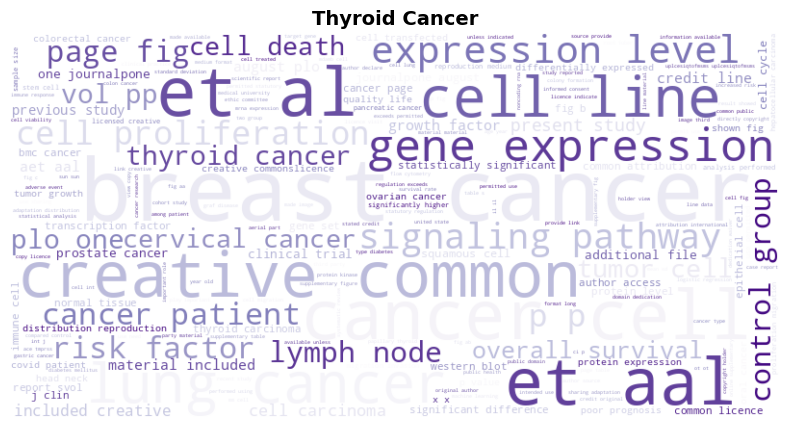

In [ ]:
# Plotting wordcloud for Thyroid Cancer
text_data = " ".join(med_text_data[med_text_data["Category"] == "Thyroid Cancer"]["Text"])

wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",
    colormap="Purples"
).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Thyroid Cancer", fontsize=14, fontweight="bold")
plt.show()

* This word cloud highlights key terms from the "Thyroid Cancer" category.
* "Cancer cell", "breast cancer" and "lung cancer" are prominent which suggests focus on cancer types and cellular mechanisms.
* "Cell proliferation", "gene expression" and "signaling pathway" indicate research into cancer growth and development.

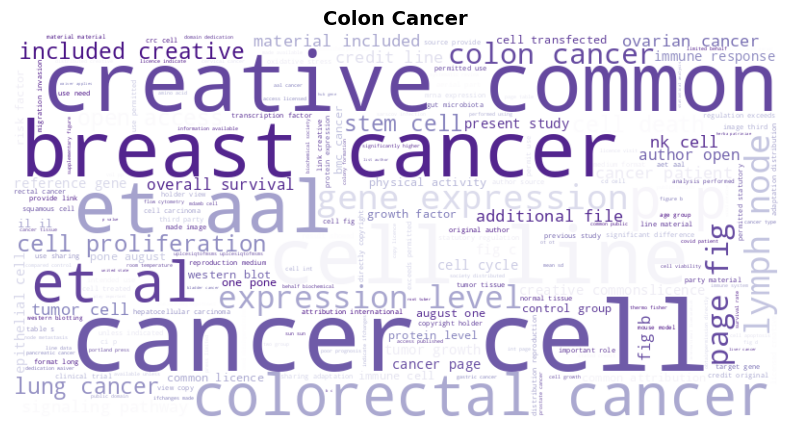

In [ ]:
# Plotting wordcloud for Colon Cancer
text_data = " ".join(med_text_data[med_text_data["Category"] == "Colon Cancer"]["Text"])

wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",
    colormap="Purples"
).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Colon Cancer", fontsize=14, fontweight="bold")
plt.show()

* "Colon Cancer" word cloud reveals key terms like "cancer cell" "breast cancer" and "cell proliferation" indicating a focus on cellular mechanisms and cancer types.
* "Patient" and "survival" highlight clinical relevance.
* "Gene expression" and "immune response" suggest research into molecular pathways and the body's defense.
* "Creative common" points to open access research.

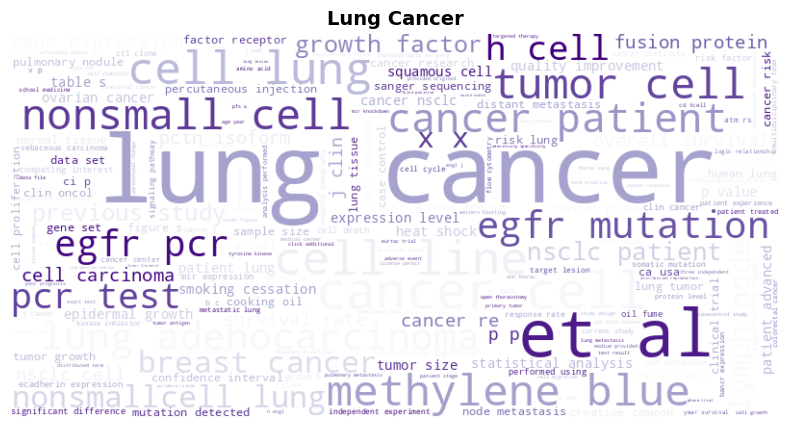

In [ ]:
# Plotting wordcloud for Lung Cancer
text_data = " ".join(med_text_data[med_text_data["Category"] == "Lung Cancer"]["Text"])

wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",
    colormap="Purples"
).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Lung Cancer", fontsize=14, fontweight="bold")
plt.show()

* This word cloud highlights "Lung Cancer" with key terms like "nsclc" (non-small cell lung cancer), "egfr" (a gene mutation), "cell line" and "gene expression."
* It shows research on lung cancer types, genetic factors and cellular mechanisms.
* "Patient" "survival" and "tumor size" indicate clinical focus.
* "Smoking cessation" suggests link to lifestyle factors.

> ## **Word Frequency**

In [ ]:
# defining function to extracts top N most frequent words for a given category
def get_top_words(category, df, top_n=10):
    """
    This function helps in extracting top N most frequent words for a given category

    Parameters:
    - category: category name
    - df: dataframe containing 'Category' and 'Text' columns
    - top_n: umber of top frequent words to extract

    Returns:
    - dataframe of top words and their frequency
    """
    # Filtering data for the category
    category_text = " ".join(df[df["Category"] == category]["Text"])

    # Tokenizing the words and converting to lowercase
    words = word_tokenize(category_text.lower())

    # Counting word frequency
    word_counts = Counter(words)

    return pd.DataFrame(word_counts.most_common(top_n), columns=["Word", "Count"])

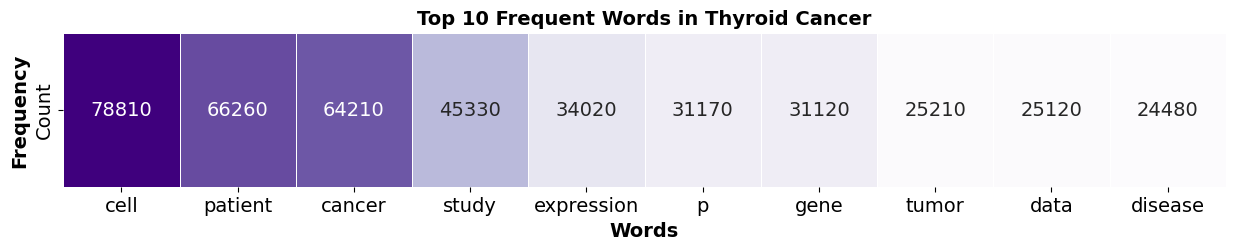

In [ ]:
# Getting the most frequent words for Thyroid Cancer
top_words_df = get_top_words("Thyroid Cancer", med_text_data)
top_words_df = top_words_df.set_index("Word").T

# Plot heatmap
plt.figure(figsize=(15, 2))
sns.heatmap(top_words_df, cmap="Purples", annot=True, fmt="d", linewidths=0.5, cbar=False, annot_kws={"size": 14})

# Adding titles and labels
plt.title("Top 10 Frequent Words in Thyroid Cancer", fontsize=14, fontweight="bold")
plt.xlabel("Words", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* This heatmap indicates that the top 10 frequent words in the Thyroid Cancer dataset.
* "Cell" is most common at 78,810 followed by "patient" at 66,260 and "cancer" at 64,210.
* "Study" appears 45,330 times and "expression" 34,020.
* Other frequent terms include "gene", "tumor", "data" and "disease".
* This highlights focus on cellular research, patient data and genetic aspects of thyroid cancer.

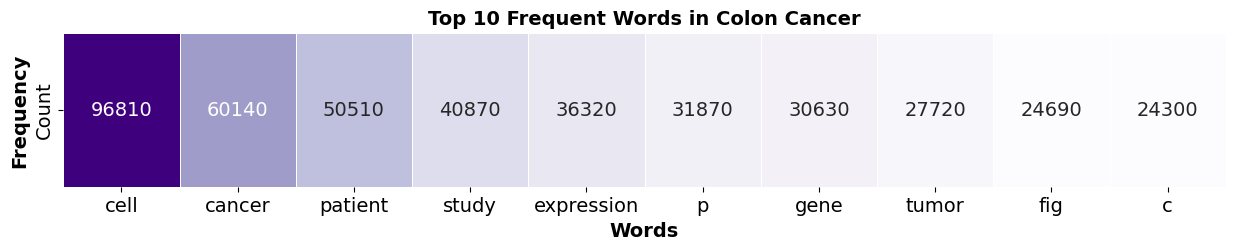

In [ ]:
# Getting the most frequent words for Colon Cancer
top_words_df = get_top_words("Colon Cancer", med_text_data)
top_words_df = top_words_df.set_index("Word").T

# Plot heatmap
plt.figure(figsize=(15, 2))
sns.heatmap(top_words_df, cmap="Purples", annot=True, fmt="d", linewidths=0.5, cbar=False, annot_kws={"size": 14})

# Adding titles and labels
plt.title("Top 10 Frequent Words in Colon Cancer", fontsize=14, fontweight="bold")
plt.xlabel("Words", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* This heatmap shows the top 10 words in the Colon Cancer dataset.
* "Cell" is most frequent at 96,810 followed by "cancer" at 60,140 and "patient" at 50,510.
* "Study" appears 40,870 times.
* Other common terms are "gene", "tumor", "fig".

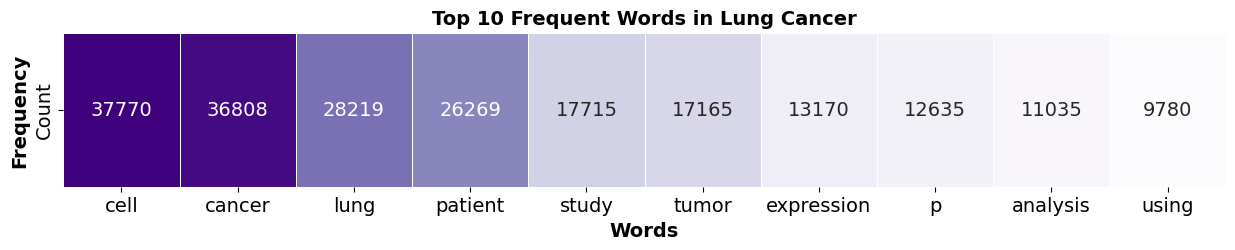

In [ ]:
# Getting the most frequent words for Lung Cancer
top_words_df = get_top_words("Lung Cancer", med_text_data)
top_words_df = top_words_df.set_index("Word").T

# Plot heatmap
plt.figure(figsize=(15, 2))
sns.heatmap(top_words_df, cmap="Purples", annot=True, fmt="d", linewidths=0.5, cbar=False, annot_kws={"size": 14})

# Adding titles and labels
plt.title("Top 10 Frequent Words in Lung Cancer", fontsize=14, fontweight="bold")
plt.xlabel("Words", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* "Cell" is most frequent at 37,770 followed by "cancer" at 36,808 and "lung" at 28,219.
* "Patient" appears 26,269 times, "study" at 17,715.
* Other common terms are "expression", "analysis" and "using".

> ## **Data Balancing : Synonym Grneration**

This approach enhances text data by replacing words with synonyms, increasing dataset diversity. It balances category distribution by generating additional samples for underrepresented classes. By expanding vocabulary and reducing model bias, it improves classification performance, making the dataset more robust for training machine learning and deep learning models effectively

In [ ]:
# defining synonym augmentation function
def generate_synonyms(text, num_replacements=2):
    """
    It generates augmented text by replacing words with synonyms

    Parameters:
    text : Input text
    num_replacements : Number of words to replace with synonyms

    Returns:
    str: Augmented text
    """
    words = text.split()
    new_words = words.copy()

    if len(words) < num_replacements:
        return text

    random_indices = random.sample(range(len(words)), num_replacements)

    for idx in random_indices:
        synonyms = wordnet.synsets(words[idx])
        if synonyms:
            synonym_words = [lemma.name().replace("_", " ") for synonym in synonyms for lemma in synonym.lemmas()]
            if synonym_words:
                new_words[idx] = random.choice(synonym_words)

    return " ".join(new_words)

In [ ]:
# Getting counts of each category
category_counts = med_text_data["Category"].value_counts()

# Target count
target_count = 2810

# Creating new dataframe to store the balanced dataset
med_text_data_balanced = med_text_data.copy()

In [ ]:
# Iterating over each category that needs balancing
for category in ["Colon Cancer", "Lung Cancer"]:
    current_count = category_counts[category]
    required_count = target_count - current_count

    if required_count > 0:
        # Selecting random samples from the existing category
        selected_samples = med_text_data[med_text_data["Category"] == category].sample(n=required_count, replace=True, random_state=42)

        # Generating augmented text
        selected_samples["Text"] = selected_samples["Text"].apply(generate_synonyms)

        # Update Text_Length and Unique_Word_Count
        selected_samples["Text_Length"] = selected_samples["Text"].apply(lambda x: len(x))
        selected_samples["Unique_Word_Count"] = selected_samples["Text"].apply(lambda x: len(set(x.split())))

        # Appending new samples to the dataset
        med_text_data_balanced = pd.concat([med_text_data_balanced, selected_samples], ignore_index=True)

In [ ]:
# Verifying new category distribution
print(med_text_data_balanced["Category"].value_counts())

Category
Thyroid Cancer    2810
Colon Cancer      2810
Lung Cancer       2810
Name: count, dtype: int64


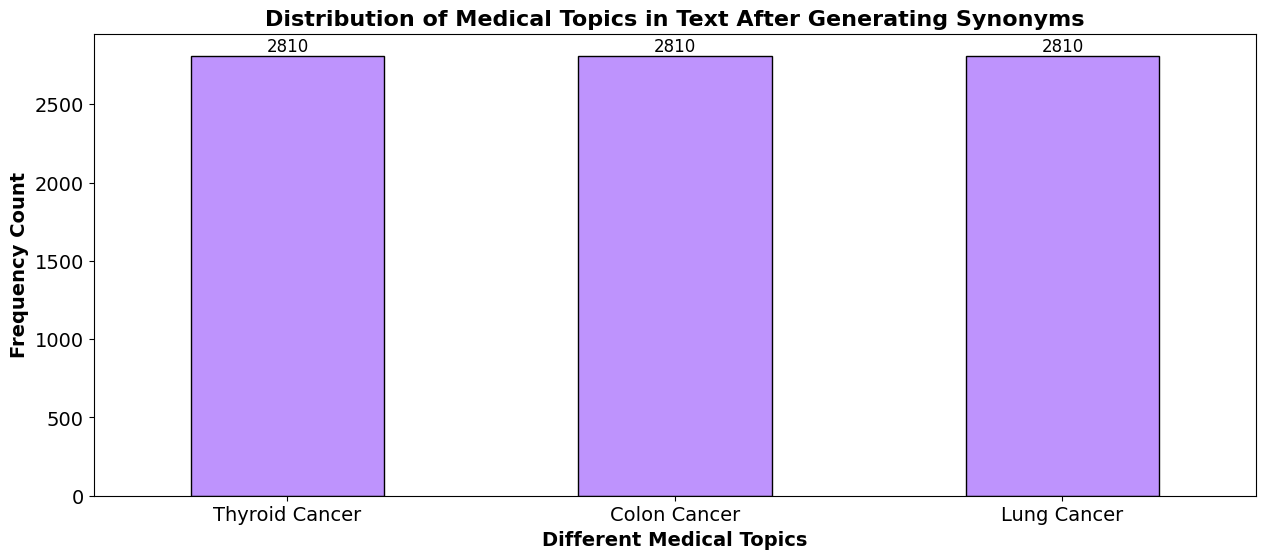

In [ ]:
# Counting occurrences of each topic
topic_counts = med_text_data_balanced["Category"].value_counts()

# plotting Stacked Bar Chart
plt.figure(figsize=(15, 6))
bars = topic_counts.plot(kind="bar", color='#be93fd', edgecolor="black")

# adding annotations on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval)}", ha="center", va="bottom", fontsize=12)

# formatting title, labels and ticks
plt.xlabel("Different Medical Topics", fontsize=14, fontweight ='bold')
plt.ylabel("Frequency Count", fontsize=14, fontweight ='bold')
plt.title("Distribution of Medical Topics in Text After Generating Synonyms", fontsize=16, fontweight ='bold')
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.show()

* This bar plot clearly shows the distribution of medical topics after synonym generation.
* Each topic, Thyroid Cancer, Colon Cancer and Lung Cancer, has 2810 entries.
* Synonym generation method appears to have evened out the dataset, with each category having an equal count.

> # **Data Preparation**

> ## **TF-IDF**

TF-IDF transforms text data into numerical form by evaluating word importance in a document relative to a collection. It highlights key terms by balancing frequency and uniqueness, reducing noise. This helps classification by improving feature representation, making models more effective in distinguishing cancer-related texts based on relevant terminology and context.

In [ ]:
med_text_data_balanced.head()

,Index,Category,Text,Readability_Score,Text_Length,Unique_Word_Count
0,0,Thyroid Cancer,thyroid surgery child single institution osama...,1124.6,20707,1098
1,1,Thyroid Cancer,adopted strategy used prior year based four ex...,971.7,17018,994
2,2,Thyroid Cancer,coronary arterybypass grafting thrombosis brin...,1150.7,21622,1384
3,3,Thyroid Cancer,solitary plasmacytoma sp skull uncommon clinic...,732.6,13860,909
4,4,Thyroid Cancer,study aimed investigate serum matrix metallopr...,1187.4,23696,1318


In [ ]:
# Text Preprocessing - TFIDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(med_text_data_balanced["Text"])

In [ ]:
# Converting category labels to numerical values
label_encoder = LabelEncoder()
med_text_data_balanced["Category_Label"] = label_encoder.fit_transform(med_text_data_balanced["Category"])
y = med_text_data_balanced["Category_Label"]

In [ ]:
# Getting class names with their corresponding index
class_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(class_mapping)

{0: 'Colon Cancer', 1: 'Lung Cancer', 2: 'Thyroid Cancer'}


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Save the TfidfVectorizer
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

> # **Model Building & Evaluation**

> ## **Naive Bayes Model**

Naive Bayes is a probabilistic algorithm based on Bayes’ theorem, assuming feature independence. It efficiently classifies biomedical text by estimating word probabilities within cancer categories. Its speed and scalability make it useful for handling large datasets, offering reliable baseline performance for comparison with advanced models like BioBERT in text classification tasks.

In [ ]:
# Naive Bayes Model
nb_model = MultinomialNB()

# Parameter Space for Bayesian Optimization
param_space = {
    'alpha': Real(1e-5, 1e5, prior='log-uniform'),
    'fit_prior': [True, False],
}

# Initialising Bayesian Optimization
bayes_nb = BayesSearchCV(
    nb_model,
    param_space,
    n_iter=3,
    cv=3,
    scoring="accuracy",
    random_state=42
)

# Fitting Model with Bayesian Optimization
bayes_nb.fit(X_train, y_train)

BayesSearchCV(cv=3, estimator=MultinomialNB(), n_iter=3, random_state=42,
              scoring='accuracy',
              search_spaces={'alpha': Real(low=1e-05, high=100000.0, prior='log-uniform', transform='normalize'),
                             'fit_prior': [True, False]})

In [ ]:
# Best Parameters found
print("Best Parameters:", bayes_nb.best_params_)

Best Parameters: OrderedDict([('alpha', 0.12619425629415187), ('fit_prior', False)])


In [ ]:
# Training RF with Best Parameters
best_nb_model = MultinomialNB(**bayes_nb.best_params_)
best_nb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.12619425629415187, fit_prior=False)

In [ ]:
# Making predictions and computing evaluation metrics
y_pred_nb = best_nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average="weighted")
recall_nb = recall_score(y_test, y_pred_nb, average="weighted")
f1_nb = f1_score(y_test, y_pred_nb, average="weighted")
kappa_nb = cohen_kappa_score(y_test, y_pred_nb)

# Printing Metrics
print("^"*38)
print("\t~~ Naive Bayes Model ~")
print("^"*38)
print(f"\t<> Accuracy: {accuracy_nb:.2f}")
print(f"\t<> Precision: {precision_nb:.2f}")
print(f"\t<> Sensitivity (Recall): {recall_nb:.2f}")
print(f"\t<> F1 Score: {f1_nb:.2f}")
print(f"\t<> Cohen’s Kappa Score: {kappa_nb:.2f}")
print("^"*38)

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	~~ Naive Bayes Model ~
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	<> Accuracy: 0.91
	<> Precision: 0.91
	<> Sensitivity (Recall): 0.91
	<> F1 Score: 0.91
	<> Cohen’s Kappa Score: 0.86
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [ ]:
# Classification Report
print("^"*55)
print("\tClassification Report - Naive Bayes")
print("^"*55)
print(classification_report(y_test, y_pred_nb))
print("^"*55)

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	Classification Report - Naive Bayes
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       572
           1       0.99      0.99      0.99       548
           2       0.88      0.86      0.87       566

    accuracy                           0.91      1686
   macro avg       0.91      0.91      0.91      1686
weighted avg       0.91      0.91      0.91      1686

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


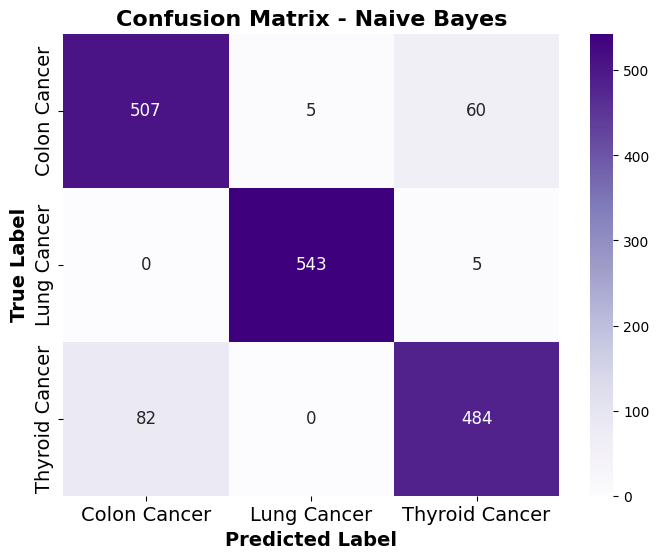

In [ ]:
# Computing and plotting confusion matrix - Naive Bayes
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot_kws={"size": 12})

plt.xlabel("Predicted Label", fontsize=14, fontweight="bold")
plt.ylabel("True Label", fontsize=14, fontweight="bold")
plt.title("Confusion Matrix - Naive Bayes", fontsize=16, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* The Naive Bayes confusion matrix visualises the model's performance in classifying three cancer types. It shows strong prediction accuracy for Lung Cancer with 543 correct classifications. There are some misclassifications, notably 60 Colon Cancer cases incorrectly predicted as Thyroid Cancer, and 82 Thyroid Cancer cases predicted as Colon Cancer. Overall, the model performs well, with room for improvement in distinguishing between Colon and Thyroid Cancers.

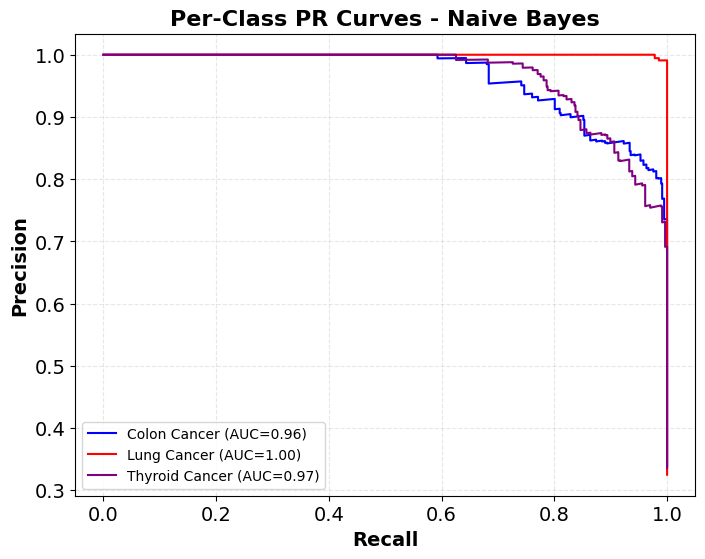

In [ ]:
# Plotting Per-Class Precision-Recall Curves
plt.figure(figsize=(8, 6))
colors = ['Blue', 'Red', 'Purple']
for class_idx, color in zip(range(len(label_encoder.classes_)), colors):
    y_true_bin = (y_test == class_idx).astype(int)
    y_scores = best_nb_model.predict_proba(X_test)[:, class_idx]
    precision, recall, _ = precision_recall_curve(y_true_bin, y_scores)
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f"{label_encoder.classes_[class_idx]} (AUC={auc_score:.2f})", color=color)

plt.xlabel("Recall", fontsize=14, fontweight="bold")
plt.ylabel("Precision", fontsize=14, fontweight="bold")
plt.title("Per-Class PR Curves - Naive Bayes", fontsize=16, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(alpha=0.3, linestyle="--")
plt.show()

* This above plot shows Precision-Recall curves for a Naive Bayes classifier on three cancer types. Lung Cancer achieves perfect classification with an AUC of 1.00. Colon Cancer has an AUC of 0.96, and Thyroid Cancer has an AUC of 0.97, indicating strong performance for both.

In [ ]:
import pickle
with open("naive_bayes_model.pkl", "wb") as model_file:
    pickle.dump(best_nb_model, model_file)

> ## **Logistic Regression Model**

Logistic Regression is a statistical approach that predicts categorical outcomes by modeling the probability of an event occurring. It maps input features to probabilities using a sigmoid curve, making it ideal for binary and multiclass classification.

In [ ]:
# Parameter space for Bayesian Optimisation
param_space = {
    "C": Real(0.001, 5, prior="log-uniform"),
    "penalty": Categorical(["l2"]),
    "solver": Categorical(["lbfgs"]),
}

# Initialising Bayesian Optimisation
bayes_lr = BayesSearchCV(
    LogisticRegression(multi_class="multinomial", random_state=42, max_iter=1000),
    param_space,
    n_iter=3,
    cv=3,
    scoring="accuracy",
    random_state=42
)

# Fitting Logistic Regression model
bayes_lr.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=LogisticRegression(max_iter=1000,
                                           multi_class='multinomial',
                                           random_state=42),
              n_iter=3, random_state=42, scoring='accuracy',
              search_spaces={'C': Real(low=0.001, high=5, prior='log-uniform', transform='normalize'),
                             'penalty': Categorical(categories=('l2',), prior=None),
                             'solver': Categorical(categories=('lbfgs',), prior=None)})

In [ ]:
# Printing best hyperparameters found
print("Best Parameters:", bayes_lr.best_params_)

Best Parameters: OrderedDict([('C', 1.2516255187507408), ('penalty', 'l2'), ('solver', 'lbfgs')])


In [ ]:
# Training Logistic Regression with Best Parameters
best_lr_model = LogisticRegression(**bayes_lr.best_params_, multi_class="multinomial", random_state=42, max_iter=1000)
best_lr_model.fit(X_train, y_train)

LogisticRegression(C=1.2516255187507408, max_iter=1000,
                   multi_class='multinomial', random_state=42)

In [ ]:
# Making predictions and computing evaluation metrics
y_pred_lr = best_lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average="weighted")
recall_lr = recall_score(y_test, y_pred_lr, average="weighted")
f1_lr = f1_score(y_test, y_pred_lr, average="weighted")
kappa_lr = cohen_kappa_score(y_test, y_pred_lr)

# Printing Metrics
print("^"*38)
print("\t~~ Logistic Regression Model ~")
print("^"*38)
print(f"\t<> Accuracy: {accuracy_lr:.2f}")
print(f"\t<> Precision: {precision_lr:.2f}")
print(f"\t<> Sensitivity (Recall): {recall_lr:.2f}")
print(f"\t<> F1 Score: {f1_lr:.2f}")
print(f"\t<> Cohen’s Kappa Score: {kappa_lr:.2f}")
print("^"*38)

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	~~ Logistic Regression Model ~
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	<> Accuracy: 0.95
	<> Precision: 0.95
	<> Sensitivity (Recall): 0.95
	<> F1 Score: 0.95
	<> Cohen’s Kappa Score: 0.92
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [ ]:
# Classification Report
print("^"*55)
print("\tClassification Report - Logistic Regression")
print("^"*55)
print(classification_report(y_test, y_pred_lr))
print("^"*55)

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	Classification Report - Logistic Regression
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       572
           1       1.00      1.00      1.00       548
           2       0.94      0.91      0.92       566

    accuracy                           0.95      1686
   macro avg       0.95      0.95      0.95      1686
weighted avg       0.95      0.95      0.95      1686

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


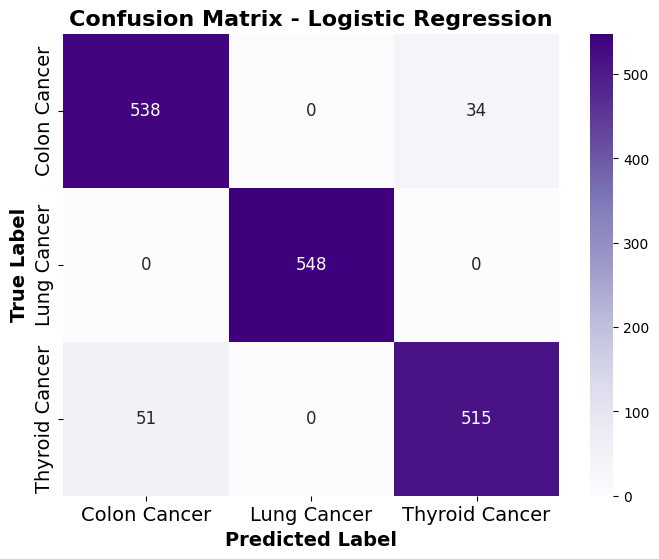

In [ ]:
# Computing and plotting confusion matrix - Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot_kws={"size": 12})

# formating titles and labels
plt.xlabel("Predicted Label", fontsize=14, fontweight="bold")
plt.ylabel("True Label", fontsize=14, fontweight="bold")
plt.title("Confusion Matrix - Logistic Regression", fontsize=16, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* The Logistic Regression confusion matrix reveals strong performance in classifying cancer types.  Lung Cancer shows perfect prediction with 548 correct classifications. Colon Cancer has 538 correct predictions, with 34 misclassified as Thyroid Cancer. Thyroid Cancer has 515 correct predictions and 51 misclassified as Colon Cancer.

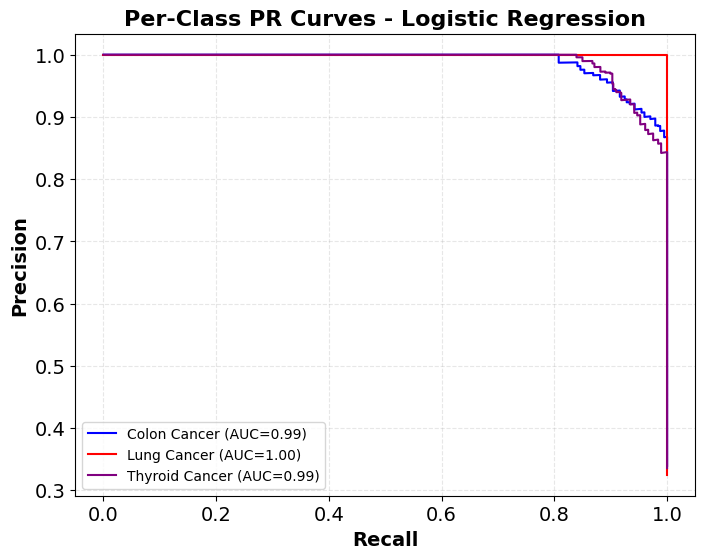

In [ ]:
# Plotting Per-Class Precision-Recall Curves
colors = ["Blue", "Red", "Purple"]
plt.figure(figsize=(8, 6))
for class_idx, color in zip(range(len(label_encoder.classes_)), colors):
    y_true_bin = (y_test == class_idx).astype(int)
    y_scores = best_lr_model.predict_proba(X_test)[:, class_idx]
    precision, recall, _ = precision_recall_curve(y_true_bin, y_scores)
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f"{label_encoder.classes_[class_idx]} (AUC={auc_score:.2f})", color=color)

# formating the title, lable and ticks
plt.xlabel("Recall", fontsize=14, fontweight="bold")
plt.ylabel("Precision", fontsize=14, fontweight="bold")
plt.title("Per-Class PR Curves - Logistic Regression", fontsize=16, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(alpha=0.3, linestyle="--")
plt.show()

* This above plot shows Precision-Recall curves for Logistic Regression. Lung Cancer achieves perfect classification with an AUC of 1.00. Both Colon Cancer and Thyroid Cancer demonstrate excellent performance, each with an AUC of 0.99.  

> ## **BioBERT Model**

BioBERT utilises deep contextualised embeddings to understand biomedical text with domain-specific language, improving accuracy in tasks like cancer document classification. It captures intricate relationships in text, enhancing feature extraction and classification performance. Fine-tuning on labeled cancer data helps identify key patterns, making it superior to traditional machine learning models.

In [ ]:
# Selecting relevant columns only
med_text_data_balanced = med_text_data_balanced[['Category', 'Text']]

# Encoding category labels
category_mapping = {label: idx for idx, label in enumerate(med_text_data_balanced['Category'].unique())}
med_text_data_balanced['Category_Label'] = med_text_data_balanced['Category'].map(category_mapping)

# Splitting the dataset
train_texts, temp_texts, train_labels, temp_labels = train_test_split(med_text_data_balanced['Text'], med_text_data_balanced['Category_Label'], test_size=0.2, random_state=42, stratify=med_text_data_balanced['Category_Label'])
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels)

<ipython-input-172-ab9c58c88705>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_text_data_balanced['Category_Label'] = med_text_data_balanced['Category'].map(category_mapping)


In [ ]:
# Loading the BioBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")

# Defining tokenization function
def tokenize_function(examples):
    return tokenizer(examples["Text"], padding="max_length", truncation=True, max_length=512)

# Converting to Hugging Face dataset format
train_data = Dataset.from_dict({"Text": train_texts.tolist(), "labels": train_labels.tolist()})
val_data = Dataset.from_dict({"Text": val_texts.tolist(), "labels": val_labels.tolist()})
test_data = Dataset.from_dict({"Text": test_texts.tolist(), "labels": test_labels.tolist()})

# Tokenising datasets
train_data = train_data.map(tokenize_function, batched=True)
val_data = val_data.map(tokenize_function, batched=True)
test_data = test_data.map(tokenize_function, batched=True)

# Removing original text column
train_data = train_data.remove_columns(["Text"])
val_data = val_data.remove_columns(["Text"])
test_data = test_data.remove_columns(["Text"])

# Setting dataset format for PyTorch
train_data.set_format("torch")
val_data.set_format("torch")
test_data.set_format("torch")

Map:   0%|          | 0/6744 [00:00<?, ? examples/s]

Map:   0%|          | 0/843 [00:00<?, ? examples/s]

Map:   0%|          | 0/843 [00:00<?, ? examples/s]

In [ ]:
# Loading BioBERT model for classification task
num_labels = len(med_text_data_balanced['Category'].unique())
model = AutoModelForSequenceClassification.from_pretrained("dmis-lab/biobert-v1.1", num_labels=num_labels)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# Data collator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Defining metric function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    kappa = cohen_kappa_score(labels, preds)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "kappa": kappa}

# Initialising Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# Training model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Kappa
1,No log,0.057808,0.986951,0.986955,0.986951,0.986951,0.980427
2,0.294500,0.045961,0.986951,0.987053,0.986951,0.986950,0.980427
3,0.045000,0.021410,0.986951,0.987053,0.986951,0.986950,0.980427


TrainOutput(global_step=1266, training_loss=0.13898821502311912, metrics={'train_runtime': 1992.9064, 'train_samples_per_second': 10.152, 'train_steps_per_second': 0.635, 'total_flos': 5323310667472896.0, 'train_loss': 0.13898821502311912, 'epoch': 3.0})

In [ ]:
# Getting predictions on test set
predictions = trainer.predict(test_data)
y_true = test_labels
y_pred_biobert = np.argmax(predictions.predictions, axis=1)

In [ ]:
# Making predictions and computing evaluation metrics
accuracy_biobert = accuracy_score(y_true, y_pred_biobert)
precision_biobert, recall_biobert, f1_biobert, _ = precision_recall_fscore_support(y_true, y_pred_biobert, average="weighted")
kappa_biobert = cohen_kappa_score(y_true, y_pred_biobert)

# Printing Metrics
print("^"*38)
print("\t~~ BioBERT Model ~")
print("^"*38)
print(f"\t<> Accuracy: {accuracy_biobert:.2f}")
print(f"\t<> Precision: {precision_biobert:.2f}")
print(f"\t<> Sensitivity (Recall): {recall_biobert:.2f}")
print(f"\t<> F1 Score: {f1_biobert:.2f}")
print(f"\t<> Cohen’s Kappa Score: {kappa_biobert:.2f}")
print("^"*38)

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	~~ BioBERT Model ~
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	<> Accuracy: 0.97
	<> Precision: 0.97
	<> Sensitivity (Recall): 0.97
	<> F1 Score: 0.97
	<> Cohen’s Kappa Score: 0.96
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [ ]:
# Classification Report
print("^"*55)
print("\tClassification Report - BioBERT")
print("^"*55)
print(classification_report(y_true, y_pred_biobert, target_names=category_mapping.keys()))
print("^"*55)

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
	Classification Report - BioBERT
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                precision    recall  f1-score   support

Thyroid Cancer       0.95      0.97      0.96       281
  Colon Cancer       0.97      0.95      0.96       281
   Lung Cancer       1.00      1.00      1.00       281

      accuracy                           0.97       843
     macro avg       0.97      0.97      0.97       843
  weighted avg       0.97      0.97      0.97       843

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


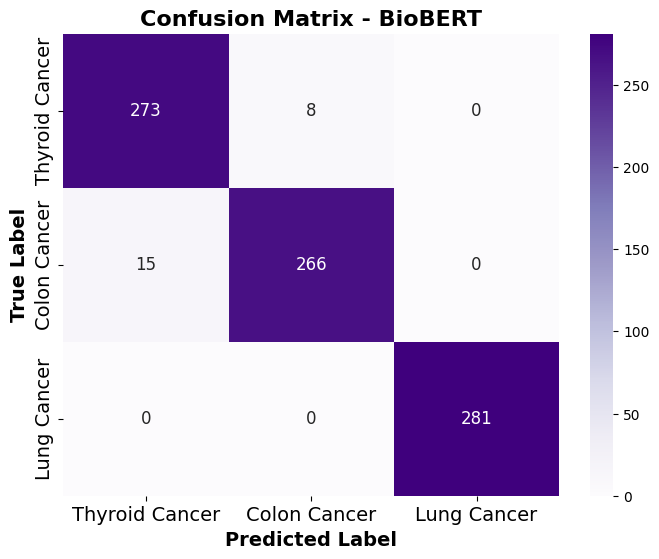

In [ ]:
# Computing and plotting confusion matrix - BioBERT
cm = confusion_matrix(y_true, y_pred_biobert)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=category_mapping.keys(), yticklabels=category_mapping.keys(),
            annot_kws={"size": 12})

plt.xlabel("Predicted Label", fontsize=14, fontweight="bold")
plt.ylabel("True Label", fontsize=14, fontweight="bold")
plt.title("Confusion Matrix - BioBERT", fontsize=16, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* BioBERT confusion matrix illustrates strong performance in classifying cancer types. Lung Cancer predictions are highly accurate with 281 correct classifications. Colon Cancer shows 266 correct classifications, with 15 misclassified as Thyroid Cancer. Thyroid Cancer has 273 correct classifications, with 8 misclassified as Colon Cancer. It demonstrates effective classification with minimal confusion across cancer types.

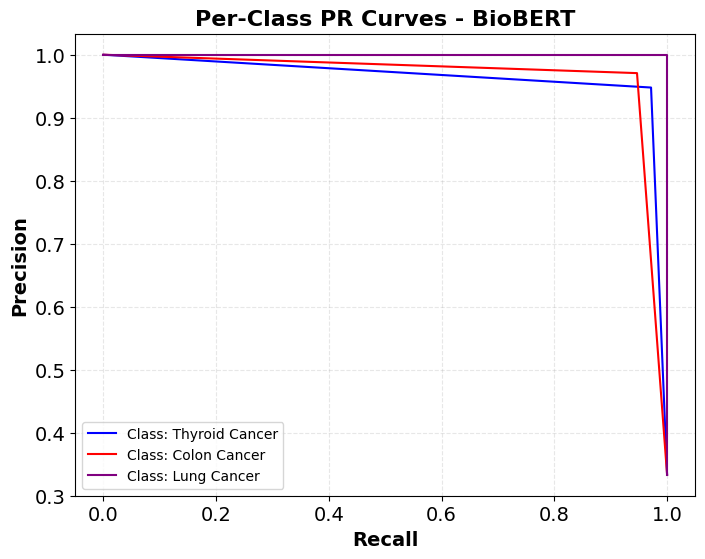

In [ ]:
# Plotting Per-Class Precision-Recall Curves
plt.figure(figsize=(8, 6))

# Defining colors for each class
colors = ['Blue', 'Red', 'Purple']

for i, (label, color) in enumerate(zip(category_mapping.keys(), colors)):
    precision, recall, _ = precision_recall_curve((y_true == i).astype(int), (y_pred_biobert == i).astype(int))
    plt.plot(recall, precision, label=f"Class: {label}", color=color)

plt.xlabel("Recall", fontsize=14, fontweight="bold")
plt.ylabel("Precision", fontsize=14, fontweight="bold")
plt.title("Per-Class PR Curves - BioBERT", fontsize=16, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(alpha=0.3, linestyle="--")
plt.show()

It displays Precision-Recall curves for BioBERT. Lung Cancer demonstrates strong performance. Colon Cancer and Thyroid Cancer also show high precision and recall. The curves indicate effective classification across all three cancer types. BioBERT maintains a good balance between precision and recall, suggesting robust performance in distinguishing between Lung, Colon and Thyroid Cancers.

In [ ]:
model_path = "./biobert_cancer_model"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

> # **Comparative Analysis**

In [ ]:
# Defining metrics for each model
metrics = {
    "Model": ["Naive Bayes", "Logistic Regression", "BioBERT"],
    "Accuracy": [0.91, 0.95, 0.97],
    "Precision": [0.91, 0.95, 0.97],
    "Recall": [0.91, 0.95, 0.97],
    "F1 Score": [0.91, 0.95, 0.97],
    "Cohen’s Kappa": [0.86, 0.92, 0.96]
}

# Creating df and saving to CSV
metrics_values = pd.DataFrame(metrics)
metrics_values.to_csv("model_evaluation_metrics.csv", index=False)
print("Metrics saved successfully!")

Metrics saved successfully!


In [ ]:
metrics_values

,Model,Accuracy,Precision,Recall,F1 Score,Cohen’s Kappa
0,Naive Bayes,0.91,0.91,0.91,0.91,0.86
1,Logistic Regression,0.95,0.95,0.95,0.95,0.92
2,BioBERT,0.97,0.97,0.97,0.97,0.96


| Model               | Accuracy | Precision | Recall | F1 Score | Cohen’s Kappa |
|---------------------|----------|-----------|--------|----------|----------------|
| Naive Bayes         | 0.91     | 0.91      | 0.91   | 0.91     | 0.86           |
| Logistic Regression | 0.95     | 0.95      | 0.95   | 0.95     | 0.92           |
| BioBERT             | 0.97     | 0.97      | 0.97   | 0.97     | 0.96           |



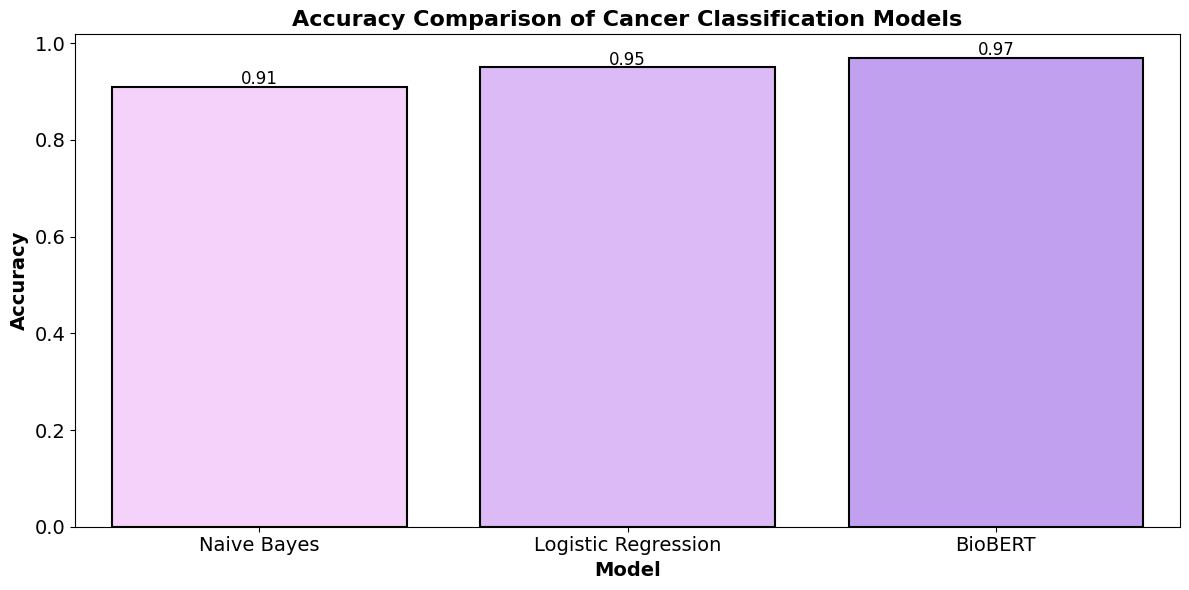

In [ ]:
# plotting bar plot to compare accuracy of models
plt.figure(figsize=(12, 6))
sns.barplot(
    data=metrics_values,
    x='Model',
    y='Accuracy',
    palette=['#faccff', '#dcb0ff', '#be93fd'],
    edgecolor='black',
    linewidth=1.5,
    hue="Model"
)

# formatting title, labels and ticks
plt.title('Accuracy Comparison of Cancer Classification Models', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# adding annotations on bars
for index, row in metrics_values.iterrows():
    plt.text(
        index,
        row['Accuracy'] + 0.005,
        f"{row['Accuracy']:.2f}",
        ha='center',
        fontsize=12
    )
plt.tight_layout()
plt.show()

This vertical bar chart compares the accuracy of three cancer classification models. BioBERT achieves the highest accuracy at 0.97, followed by Logistic Regression at 0.95. Naive Bayes has the lowest accuracy at 0.91. BioBERT demonstrates the strongest performance in accurately classifying cancer types, indicating its superior effectiveness compared to Logistic Regression and Naive Bayes.

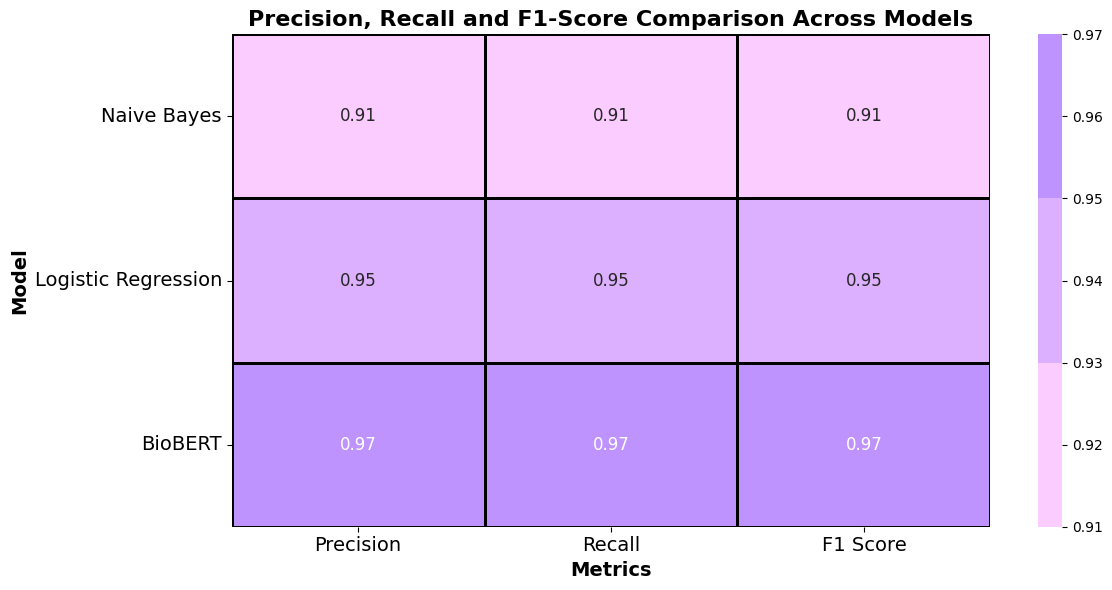

In [ ]:
# filter to include only Precision, Recall and F1-Score
metrics_filtered = metrics_values[['Model', 'Precision', 'Recall', 'F1 Score']].set_index('Model')

# plotting heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    metrics_filtered,
    annot=True,
    cmap=['#faccff', '#dcb0ff', '#be93fd'],
    linewidths=1.0,
    linecolor='black',
    fmt='.2f',
    cbar=True,
    annot_kws={"size": 12}
)

# formatting title, labels and ticks
plt.title('Precision, Recall and F1-Score Comparison Across Models', fontsize=16, fontweight='bold')
plt.xlabel('Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Model', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()
plt.show()

This heatmap compares precision, recall and f1-score across three models. BioBERT demonstrates superior performance with precision, recall, and f1-scores of 0.97 across the board. Logistic Regression shows strong results, achieving 0.95 for all three metrics. In contrast, Naive Bayes has the lowest scores, with 0.91 for precision, recall and f1-score.  BioBERT consistently outperforms the other models, indicating its effectiveness in this classification task.

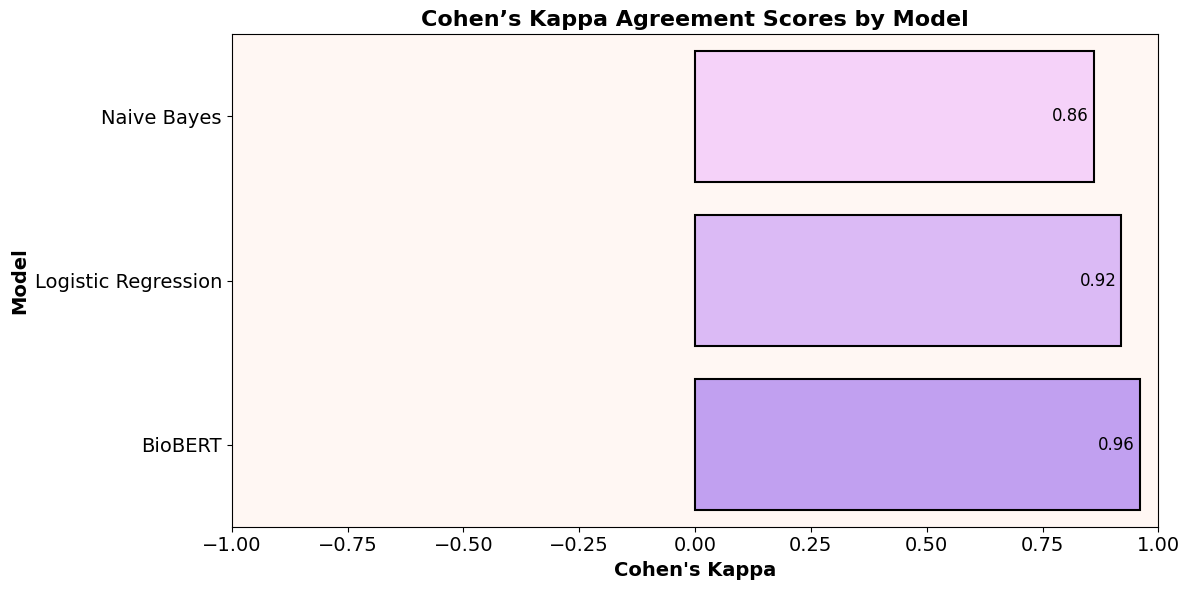

In [ ]:
# plotting horizontal barplot to compare Cohen’s Kappa
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('#FFF7F3')
sns.barplot(
    data=metrics_values,
    y='Model',
    x="Cohen’s Kappa",
    palette=['#faccff', '#dcb0ff', '#be93fd'],
    edgecolor='black',
    linewidth=1.5,
    hue='Model'
)

# adding annotations for the Cohen's Kappa scores
for index, value in enumerate(metrics_values["Cohen’s Kappa"]):
    plt.text(value - 0.09, index, f'{value:.2f}', va='center', fontsize=12)

# formatting title, labels, and ticks
plt.xlim(-1, 1)
plt.title("Cohen’s Kappa Agreement Scores by Model", fontsize=16, fontweight='bold')
plt.xlabel("Cohen's Kappa", fontsize=14, fontweight='bold')
plt.ylabel("Model", fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

This horizontal bar chart compares Cohen's Kappa scores across three models. BioBERT shows the strongest agreement with a score of 0.96, indicating near-perfect agreement. Logistic Regression achieves a substantial agreement with a score of 0.92. Naive Bayes demonstrates moderate agreement with a score of 0.86. So BioBERT exhibits the highest level of agreement, suggesting more reliable and consistent classification performance compared to the other models.

> # **Final Conclusion**

Comparison between traditional and advanced models reveals that BioBERT outperforms Naive Bayes and Logistic Regression in terms of accuracy, precision, recall, and F1 score. While Naive Bayes and Logistic Regression achieved a precision of 0.91, BioBERT reached a precision of 0.97. Advanced methods like BioBERT, using contextual embeddings, provided superior performance compared to traditional models that relied on TFIDF preprocessing.